# Set Up
- Download the ECG dataset hosted on kaggle. **This step requires a Kaggle API token.**
- Clone the project repository to access the experiment models

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files

uploaded = files.upload()

# make sure there is a kaggle.json file
!ls -lha kaggle.json

# install the Kaggle API token
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (1).json
-rw-r--r-- 1 root root 67 Nov 11 04:07 kaggle.json


In [3]:
# download and unzip the ECG dataset hosted on kaggle
!kaggle datasets download -d shayanfazeli/heartbeat
!unzip -q heartbeat.zip

heartbeat.zip: Skipping, found more recently modified local copy (use --force to force download)
replace mitbih_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace mitbih_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ptbdb_abnormal.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ptbdb_normal.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [5]:
# load data
df = pd.read_csv("mitbih_train.csv", header=None)
test_df = pd.read_csv("mitbih_test.csv", header=None)

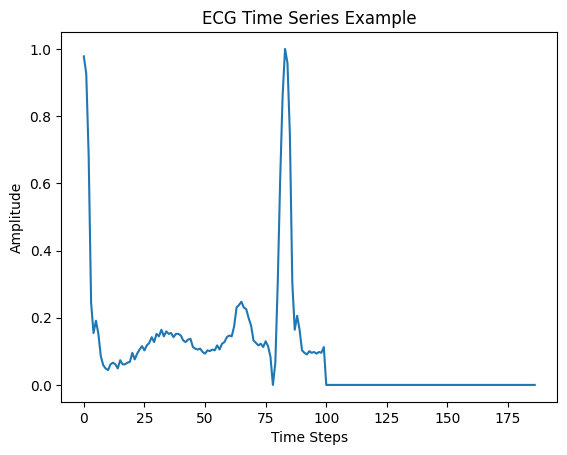

In [6]:
# time series plot of the first sample
# exclude the last column (label)
plt.plot(df.iloc[0, :-1])
plt.title("ECG Time Series Example")
plt.xlabel("Time Steps")
plt.ylabel("Amplitude")
plt.show()

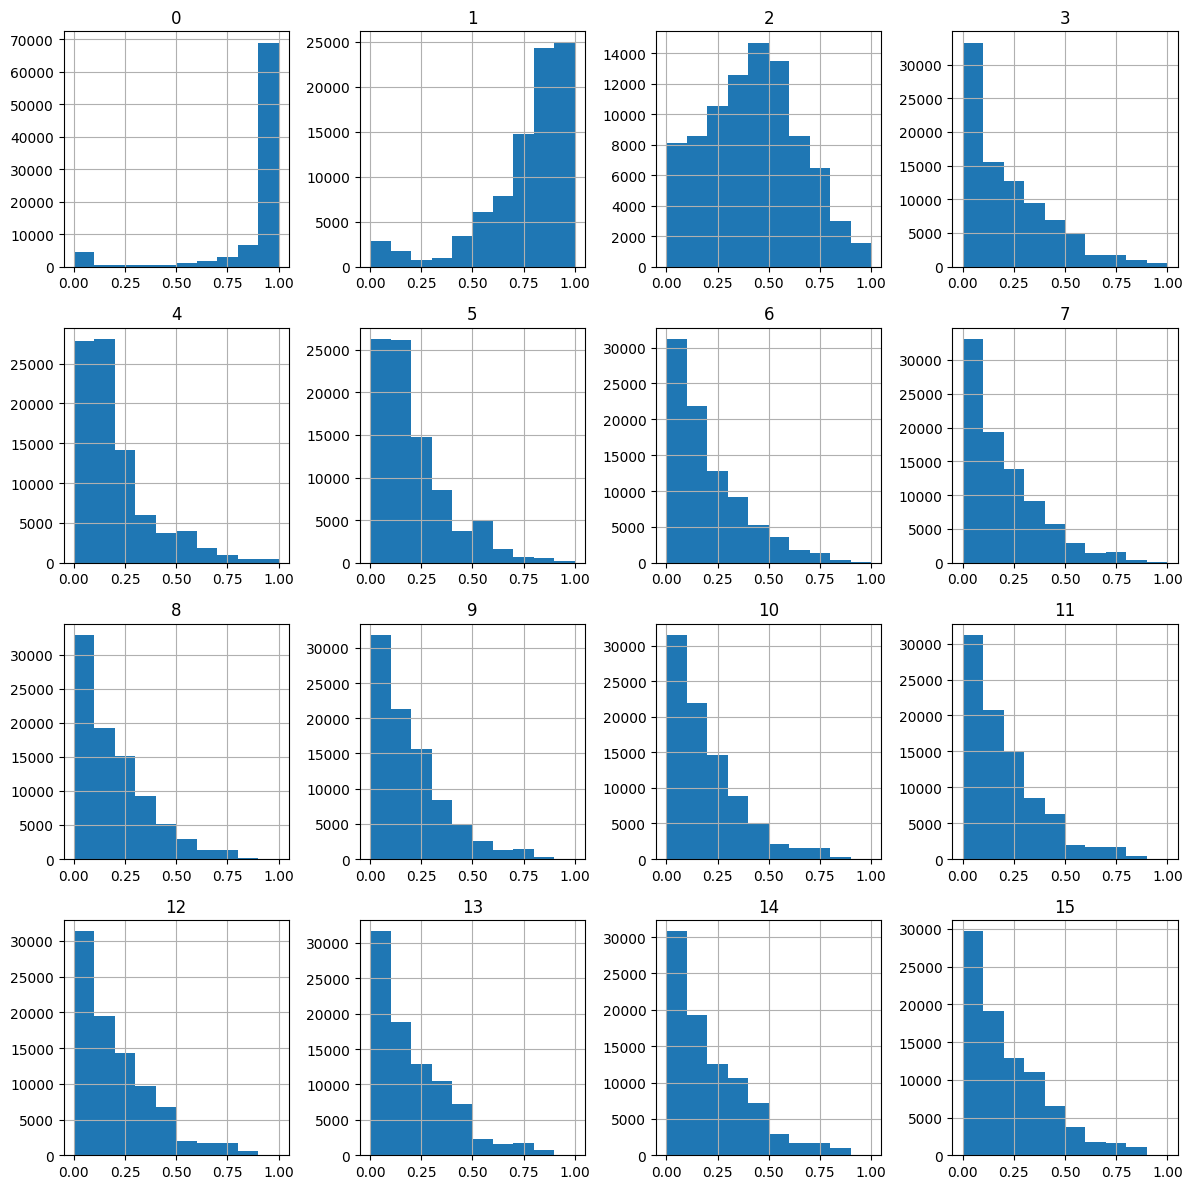

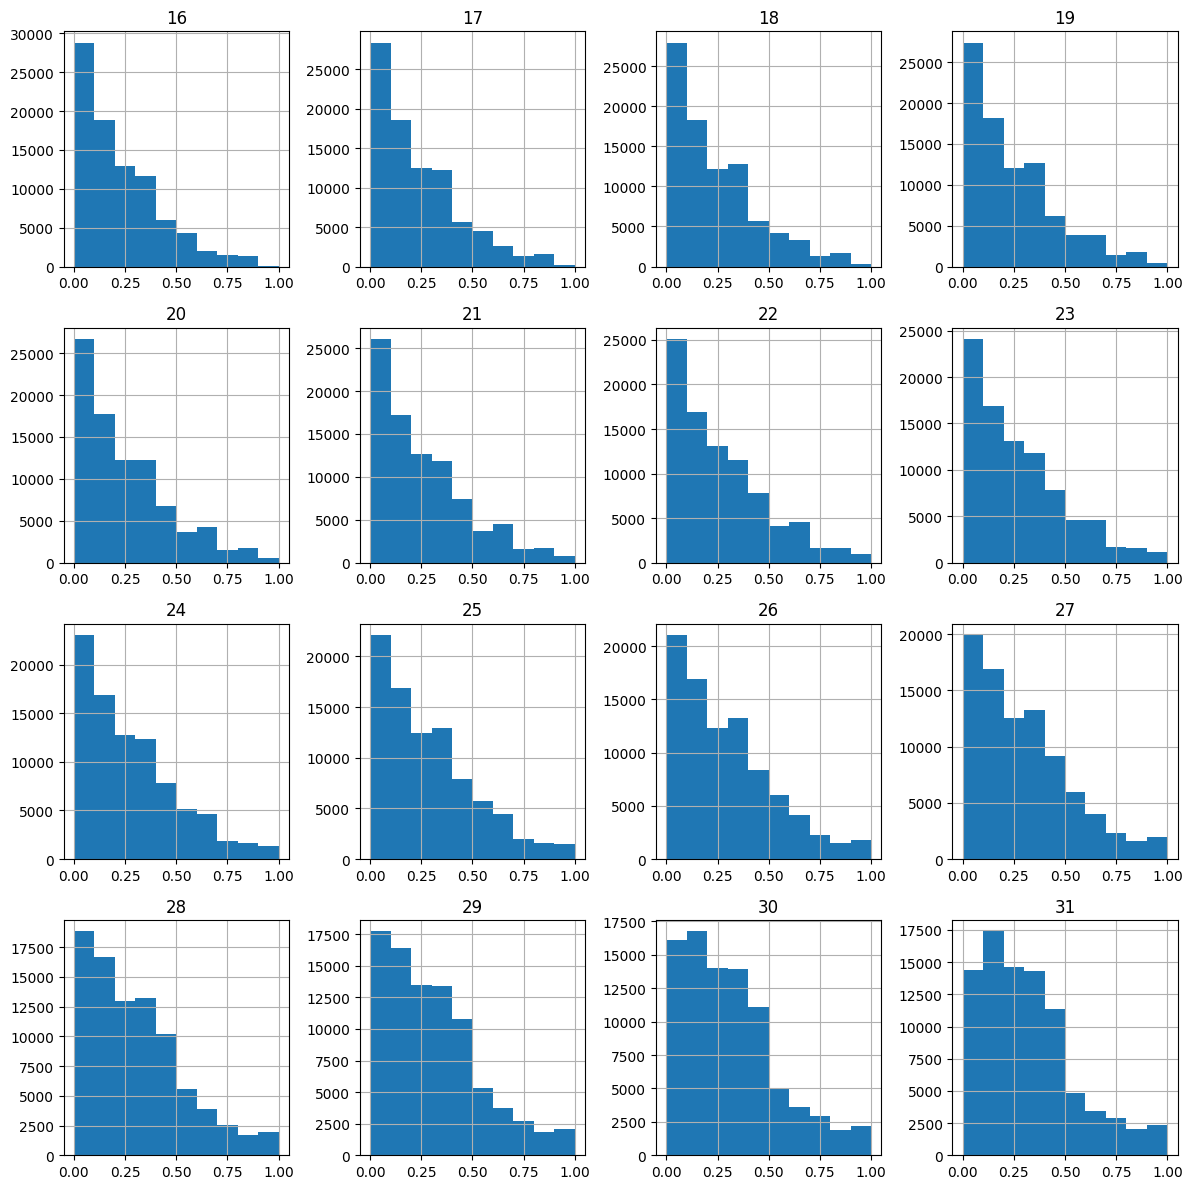

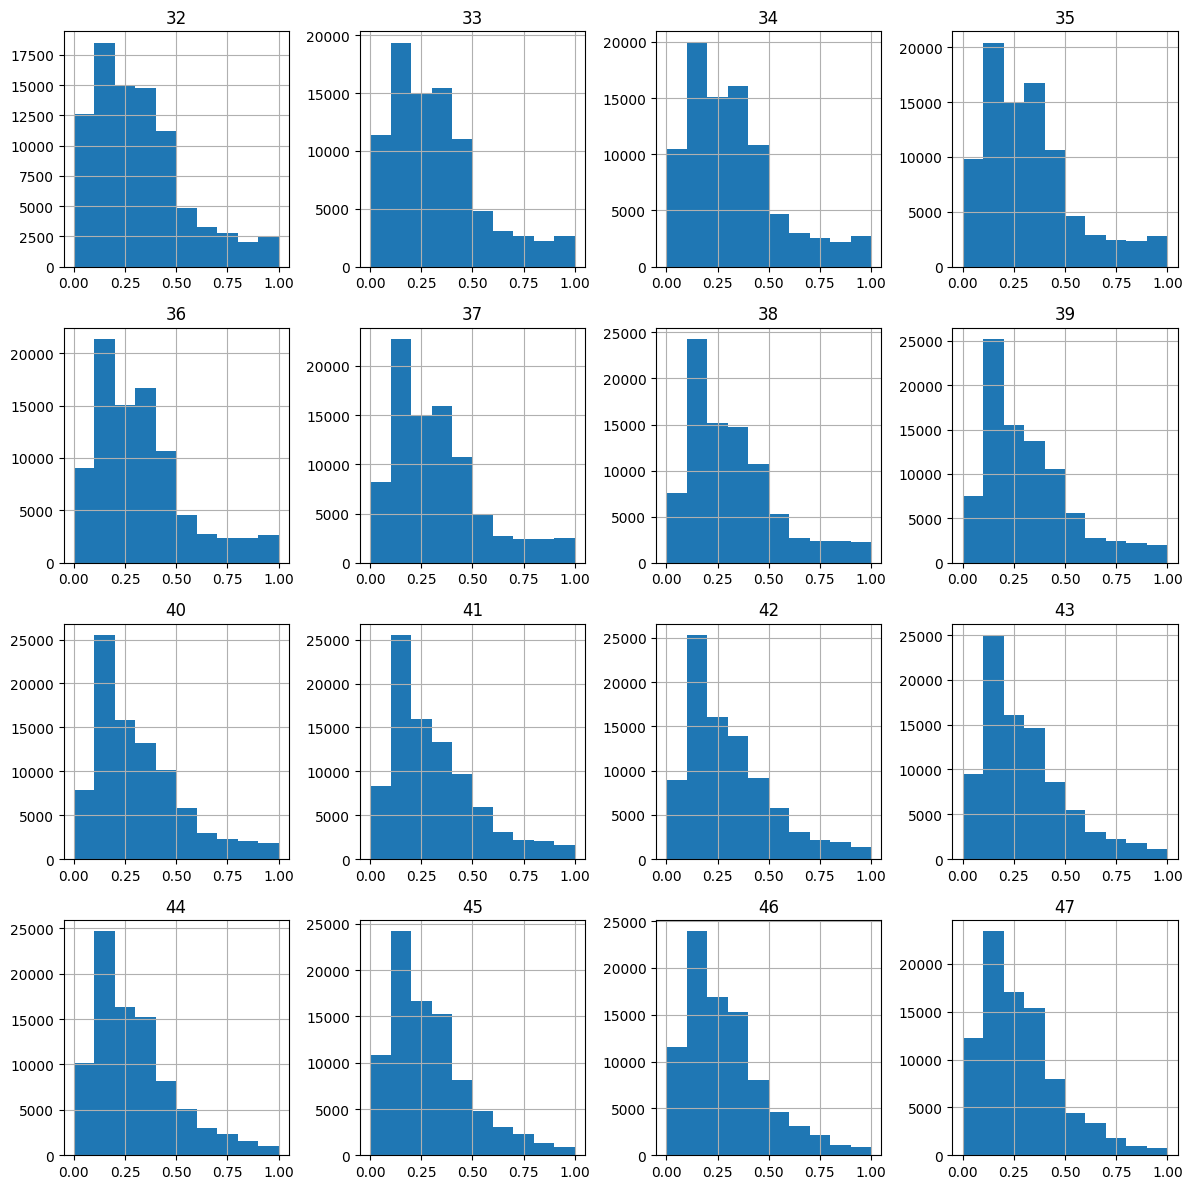

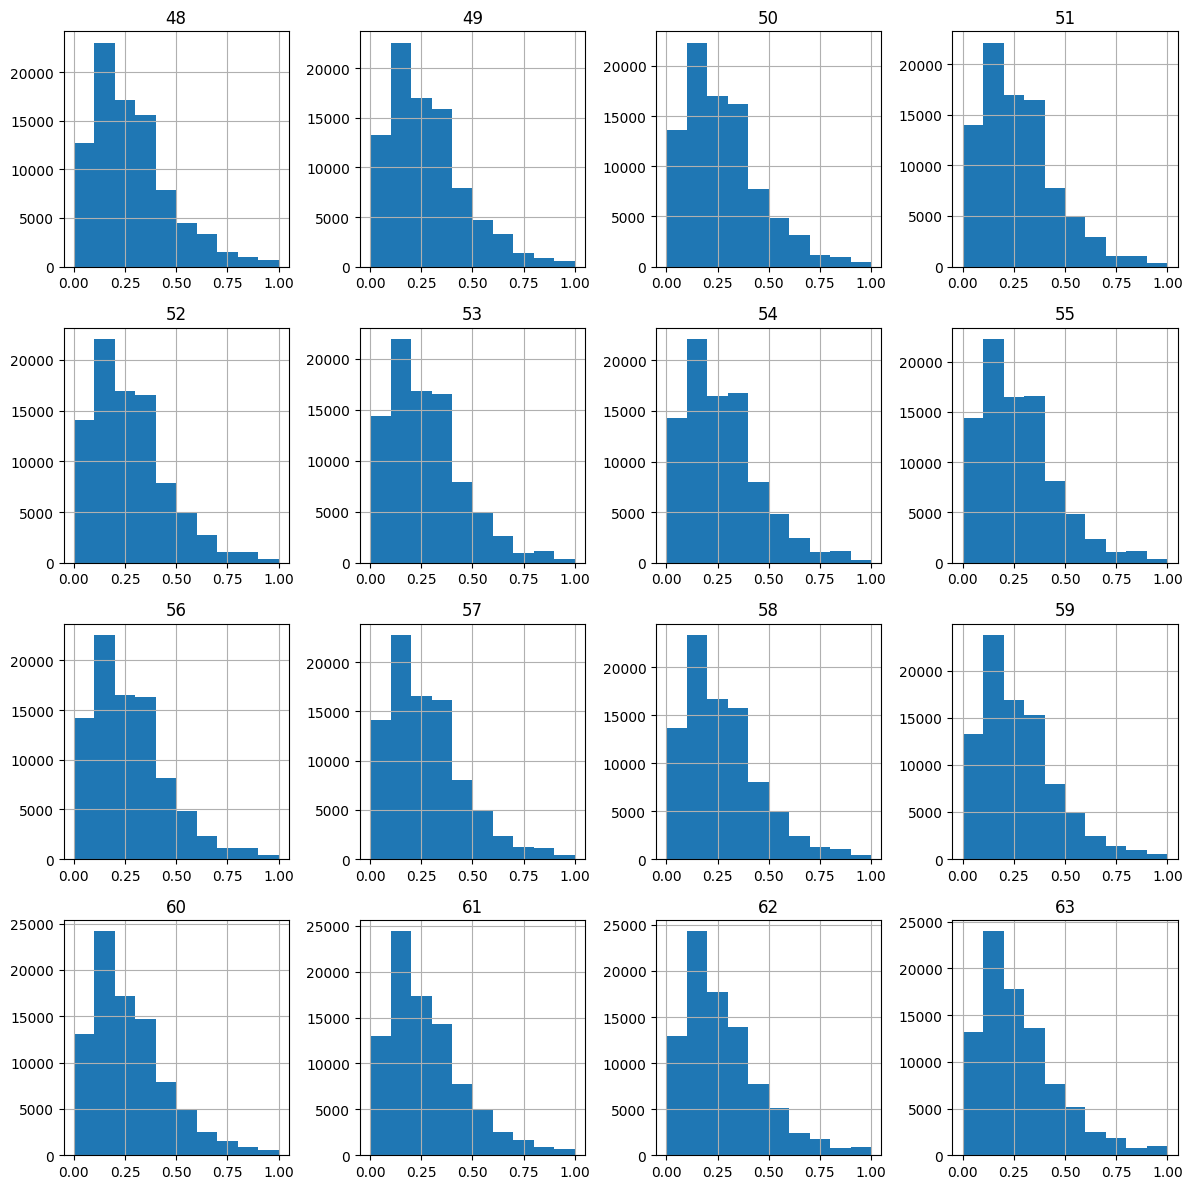

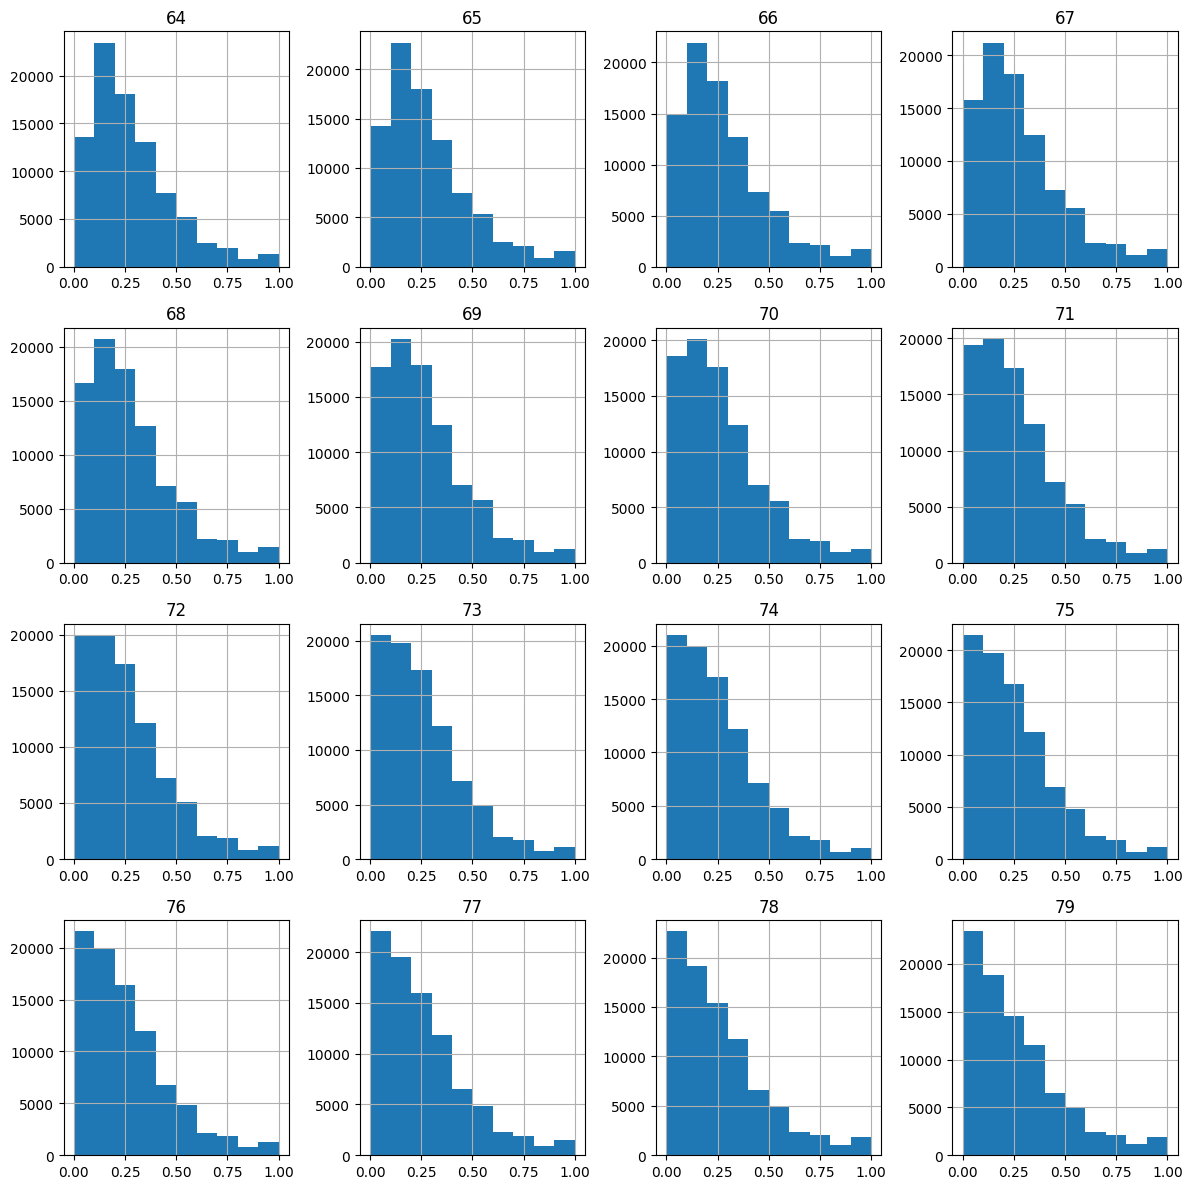

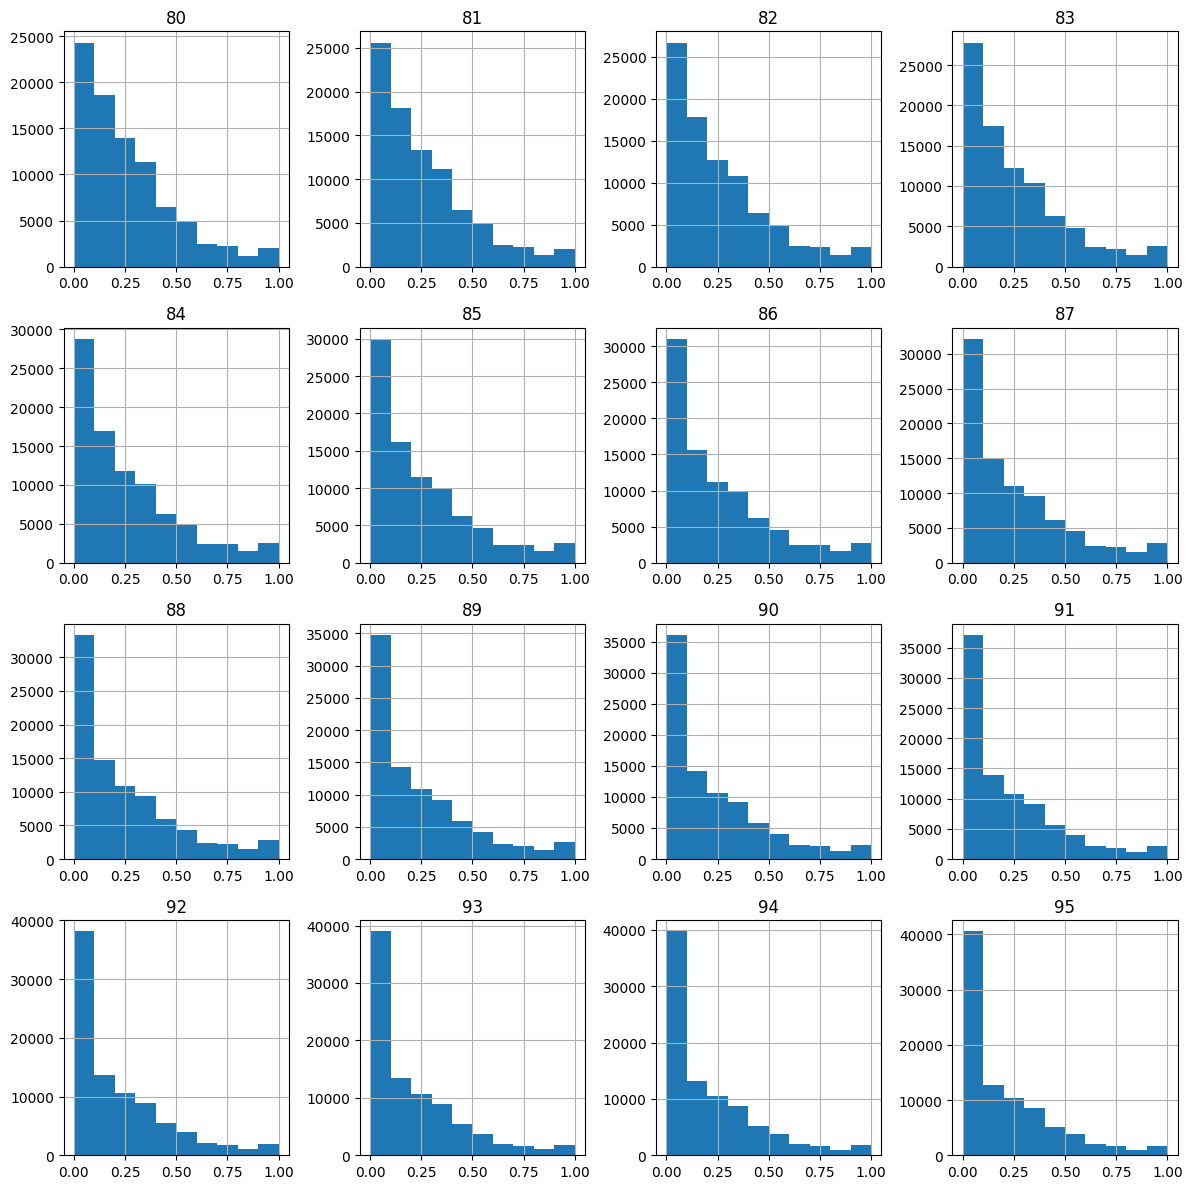

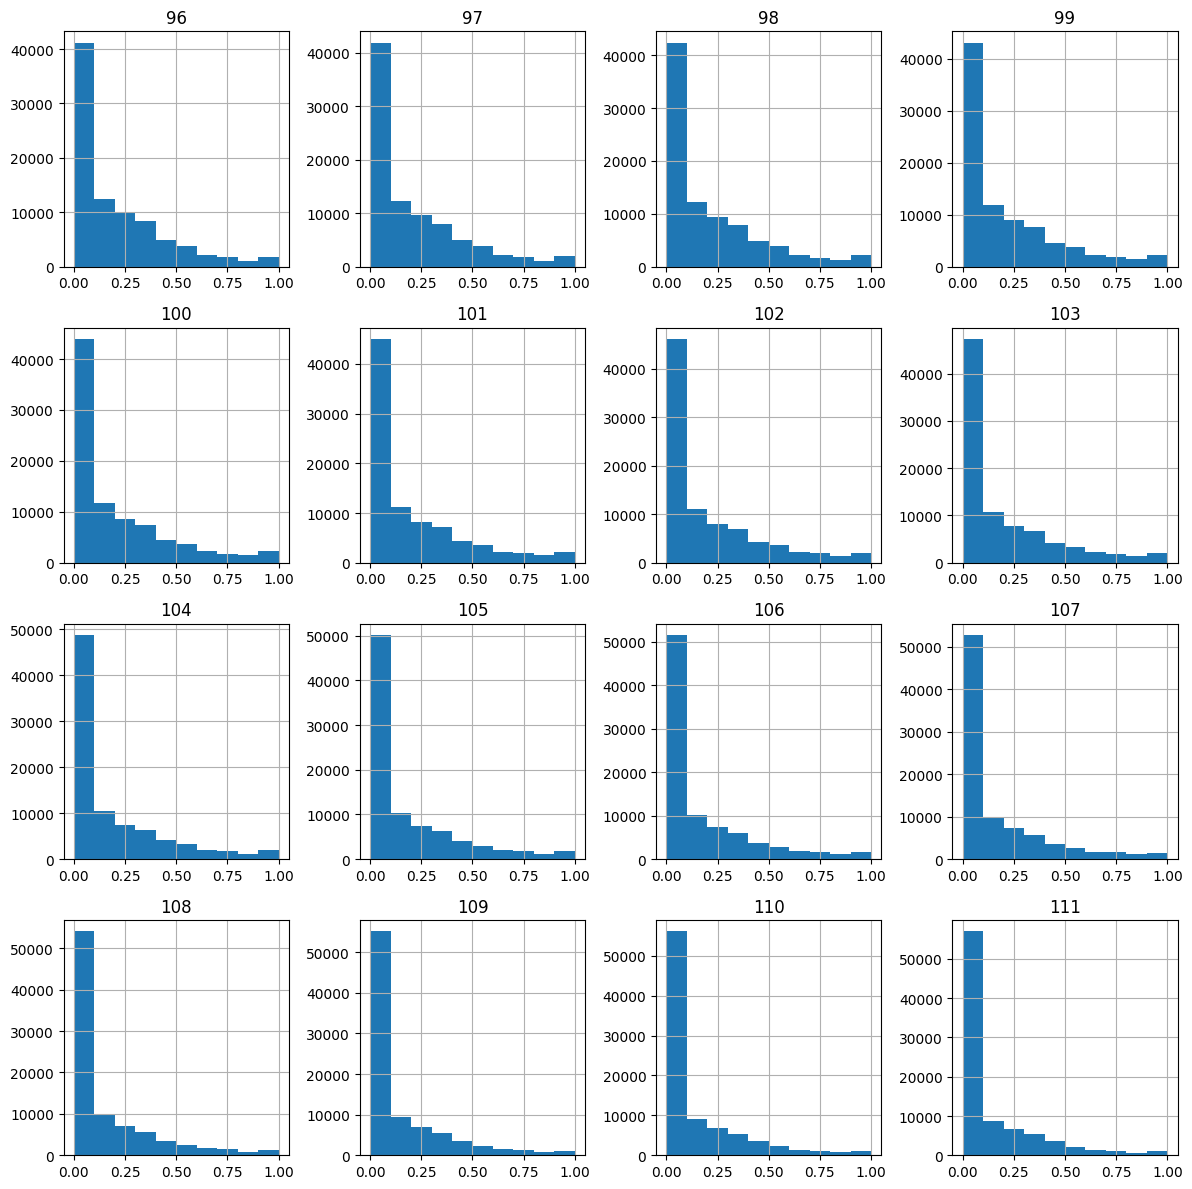

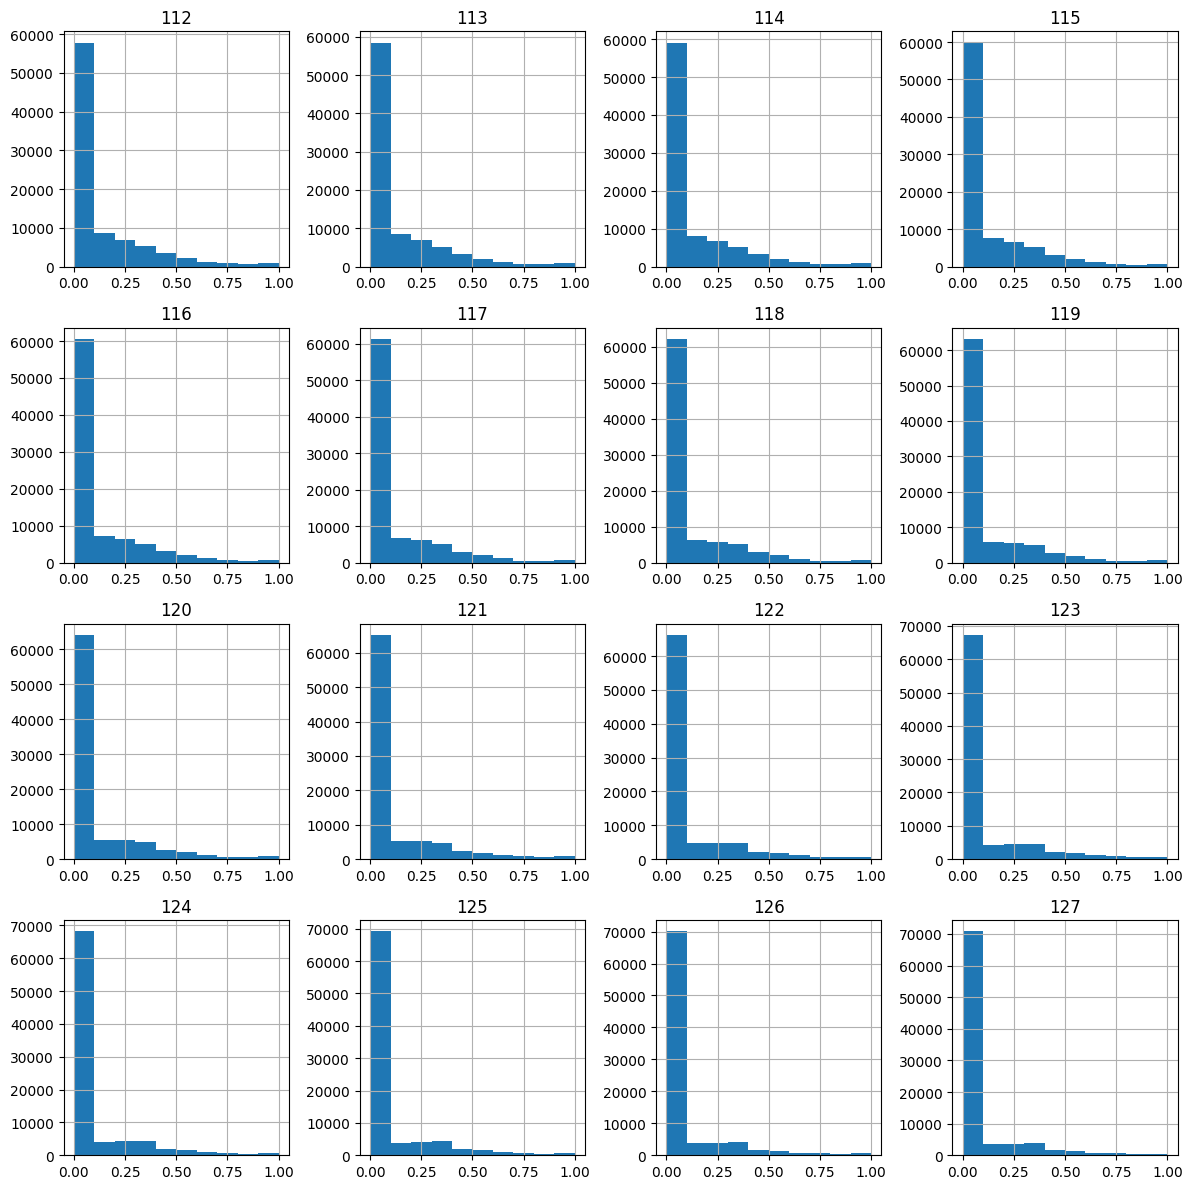

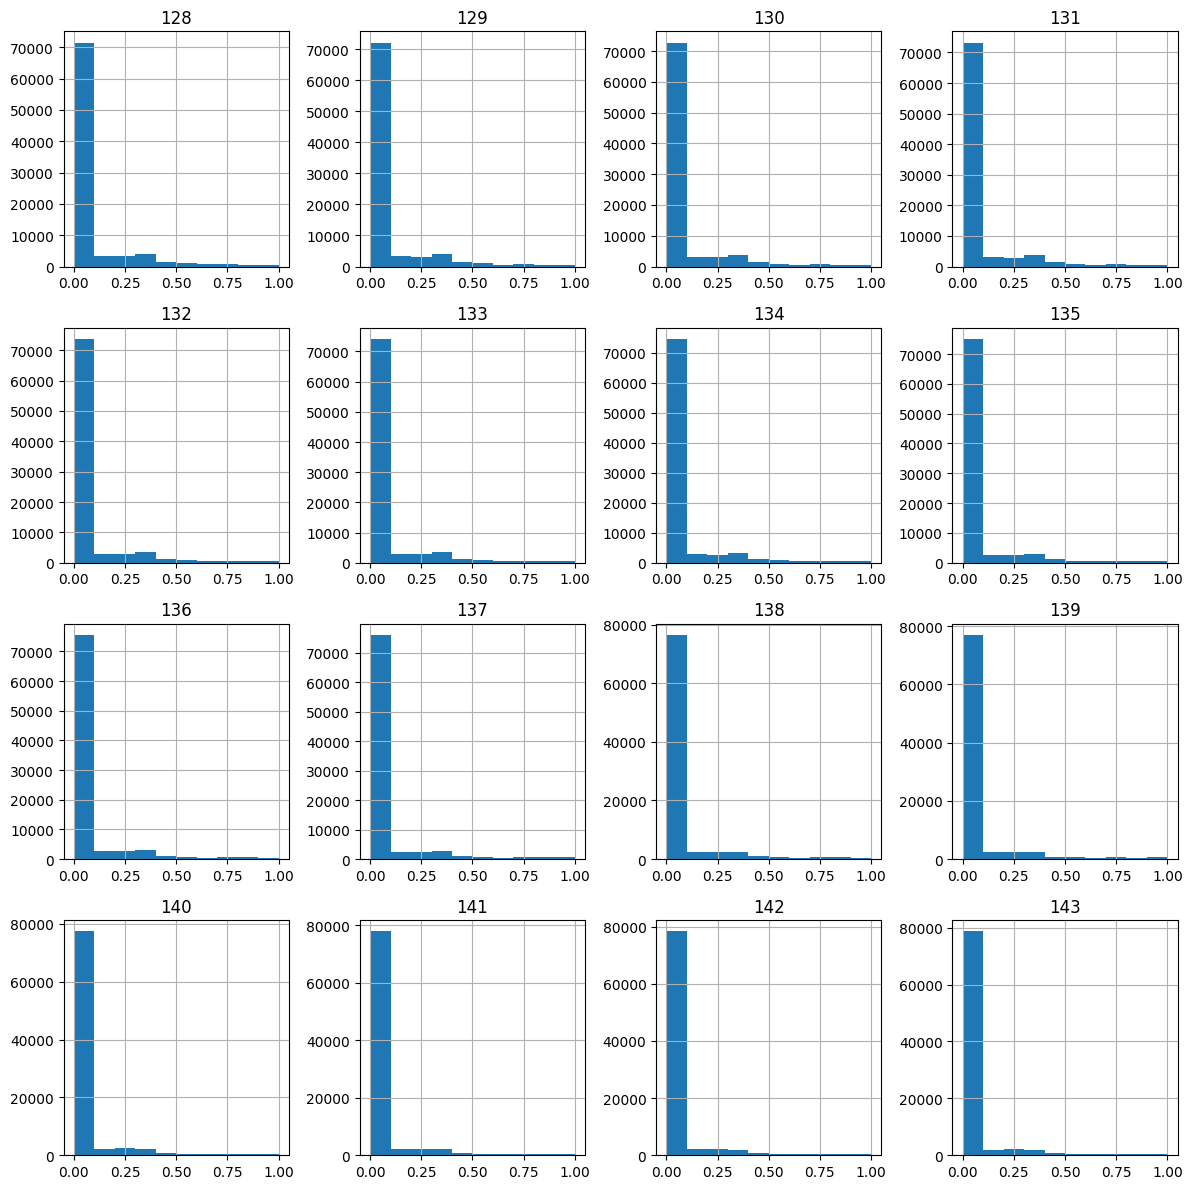

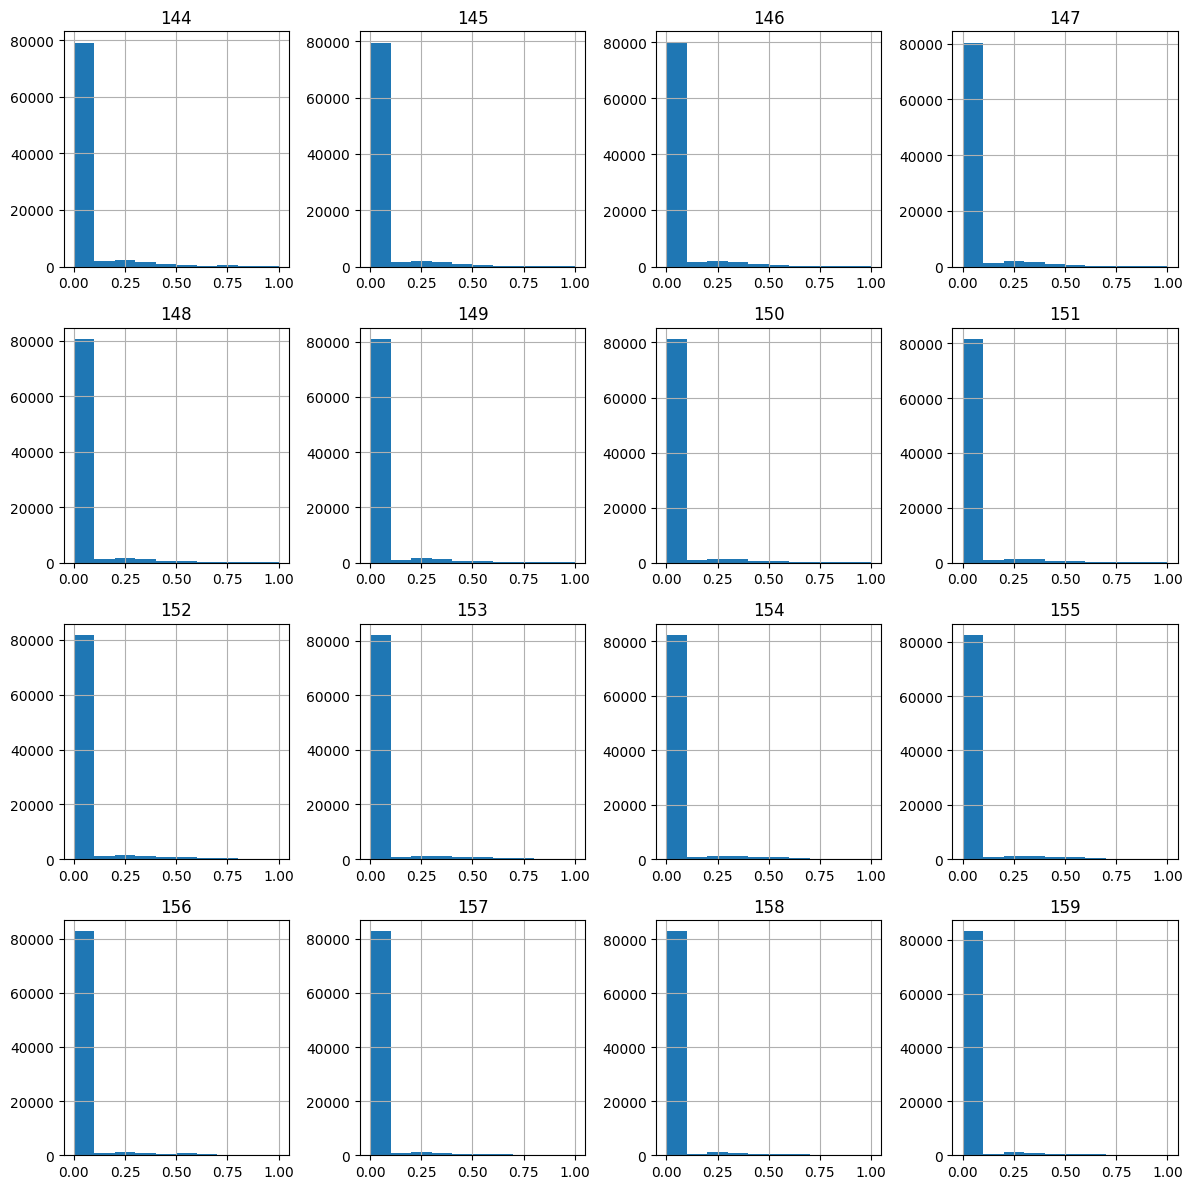

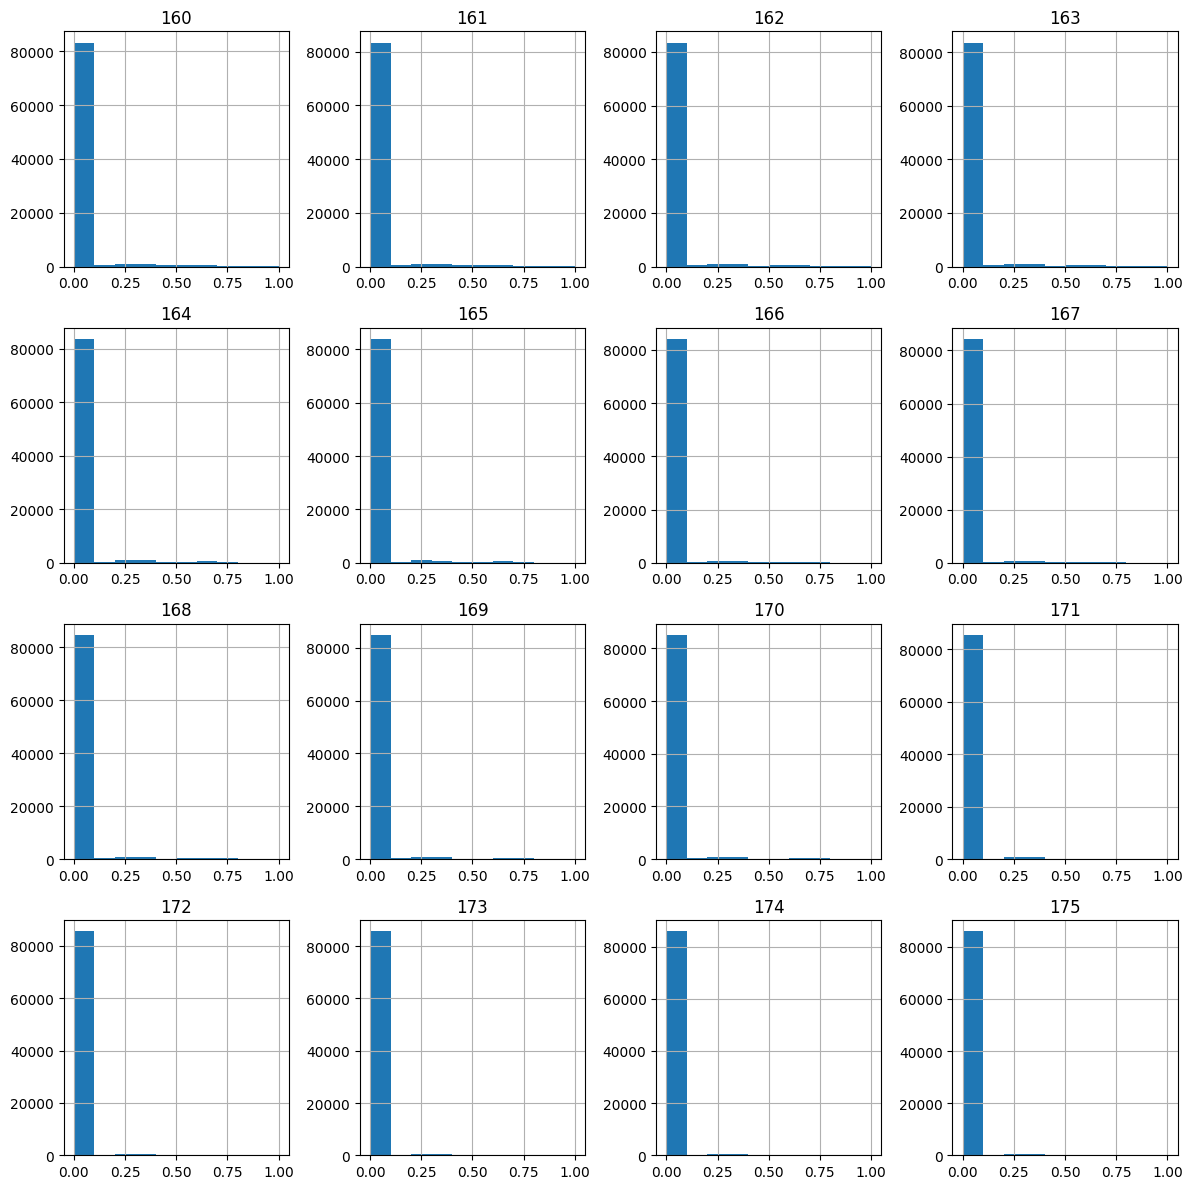

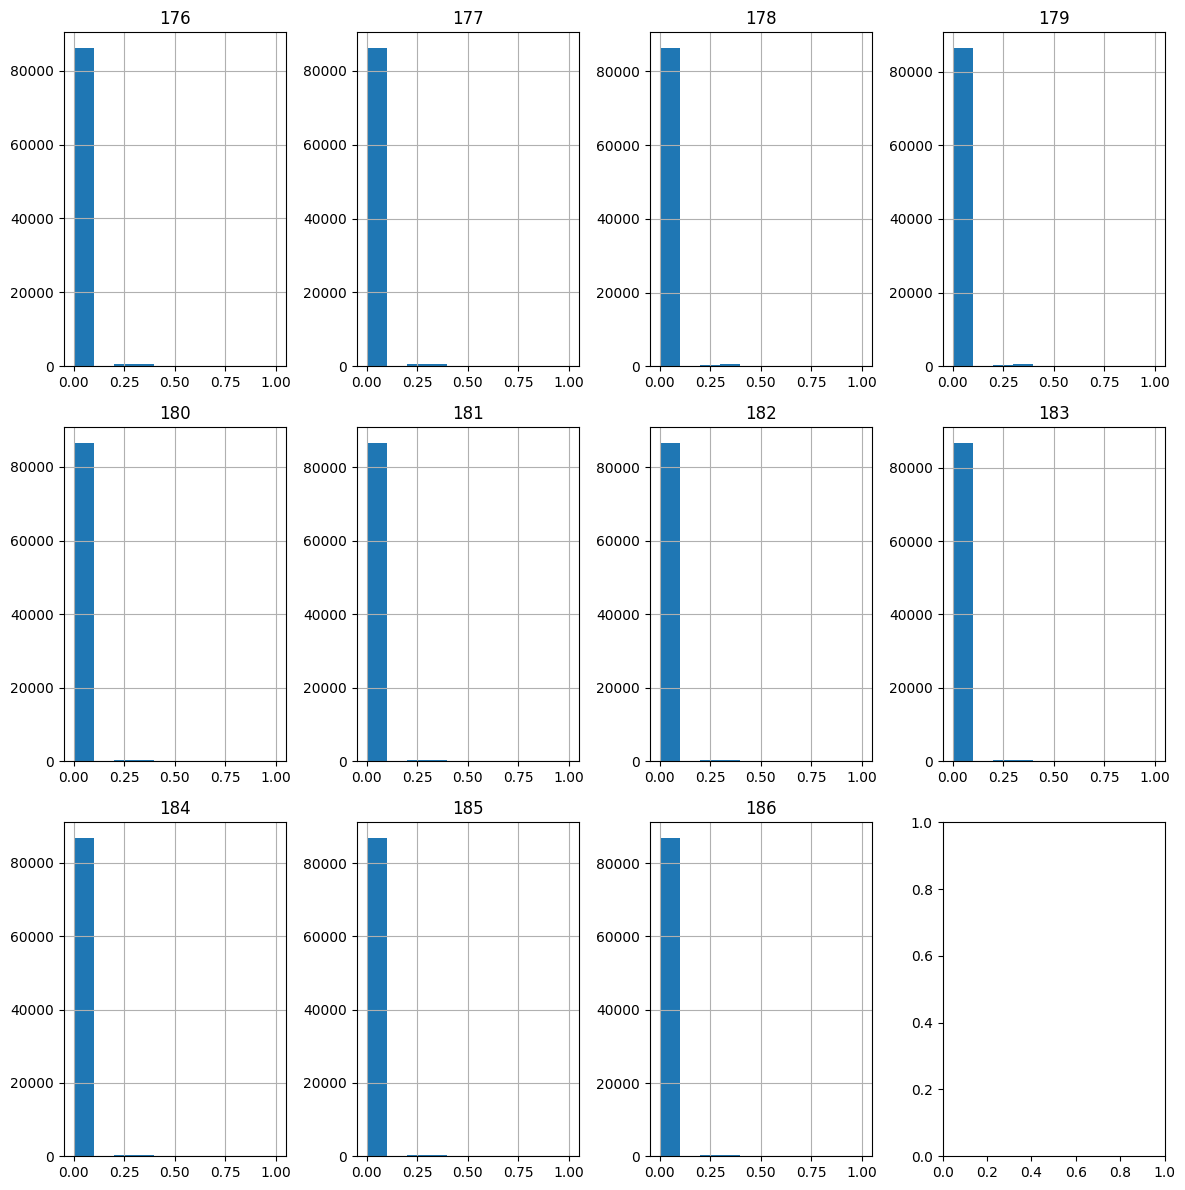

In [7]:
# calculate the number of subplots and figures needed
features_per_figure = 16

# find the number of subplots and figures needed
num_features = df.shape[1] - 1
num_figures = int(np.ceil(num_features / features_per_figure))

# feature histograms
for i in range(num_figures):
    start_idx = i * features_per_figure
    end_idx = min(start_idx + features_per_figure, num_features)
    subset = df.iloc[:, start_idx:end_idx]

    # find the number of rows and columns
    num_plots = end_idx - start_idx
    nrows = int(np.ceil(num_plots / 4))
    ncols = 4 if num_plots > 4 else num_plots

    # create the subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 12))

    # flatten the axes array and pass only the needed axes to hist
    axes = axes.flatten()[:num_plots]
    subset.hist(ax=axes)

    plt.tight_layout()
    plt.show()

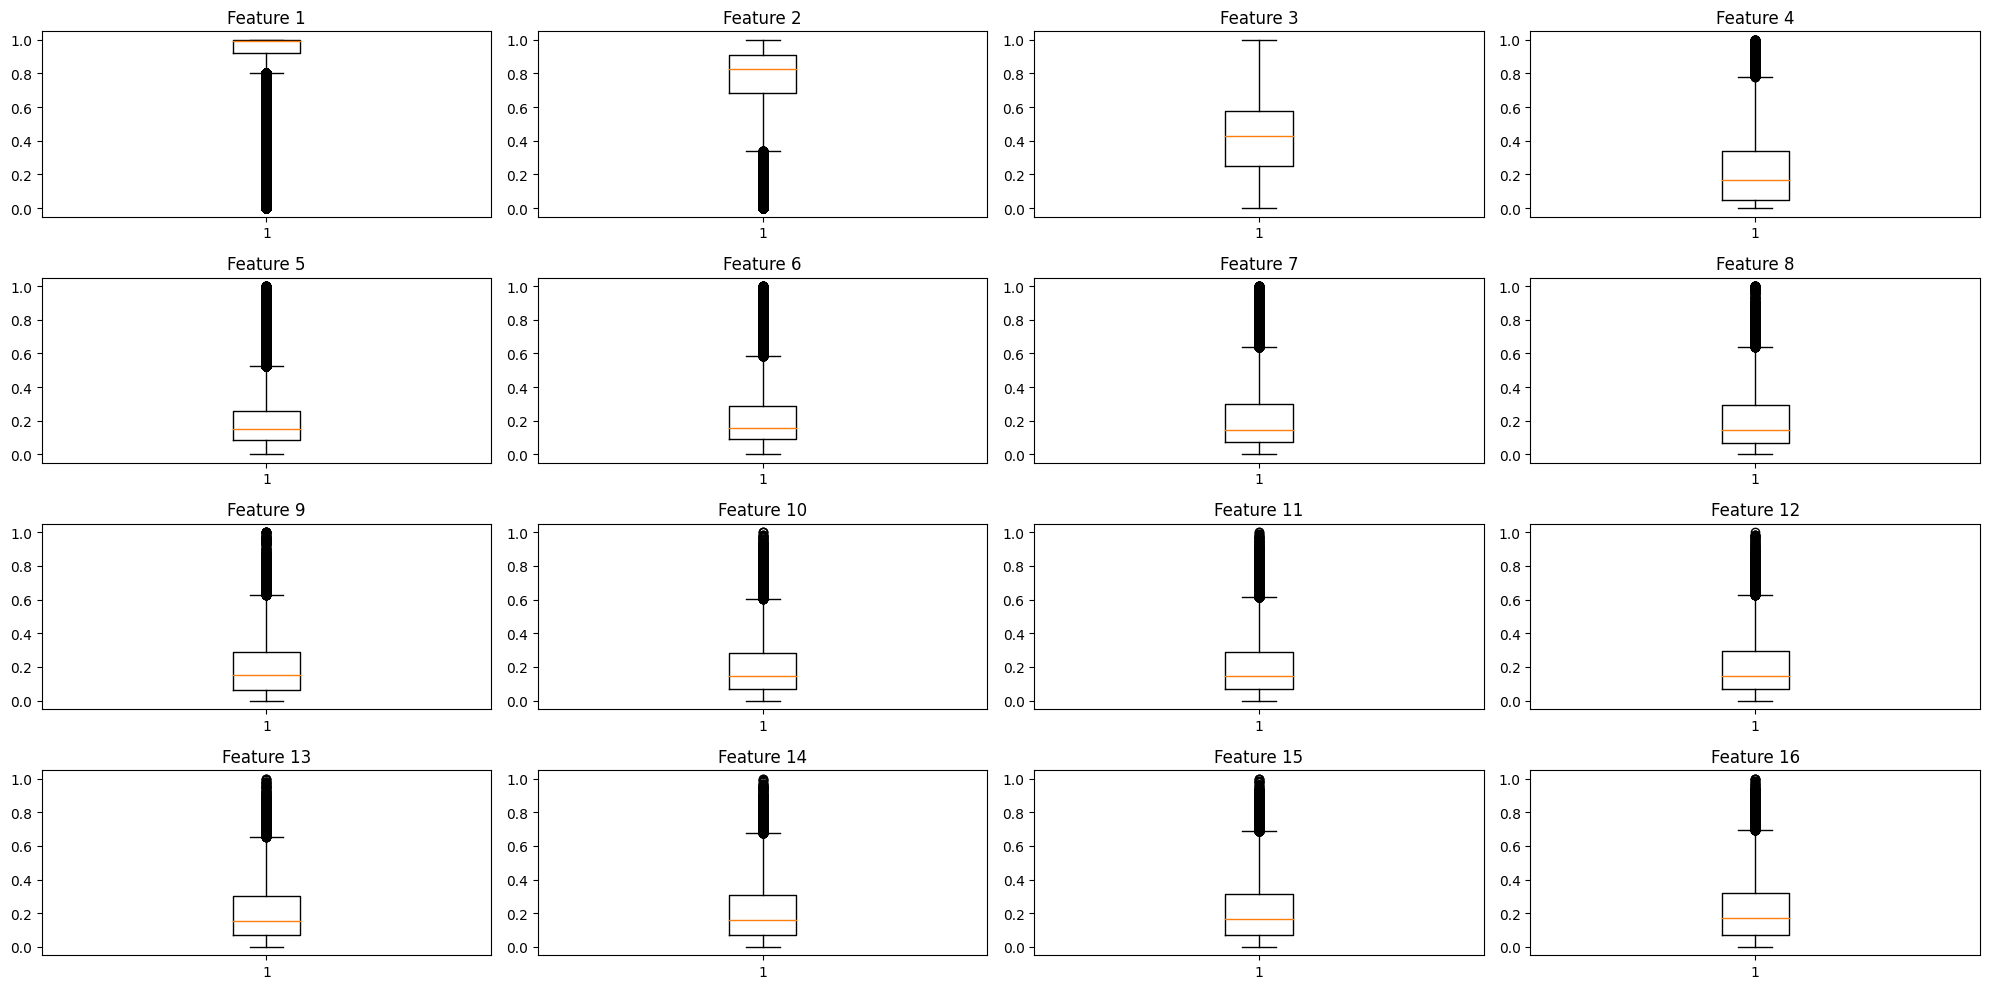

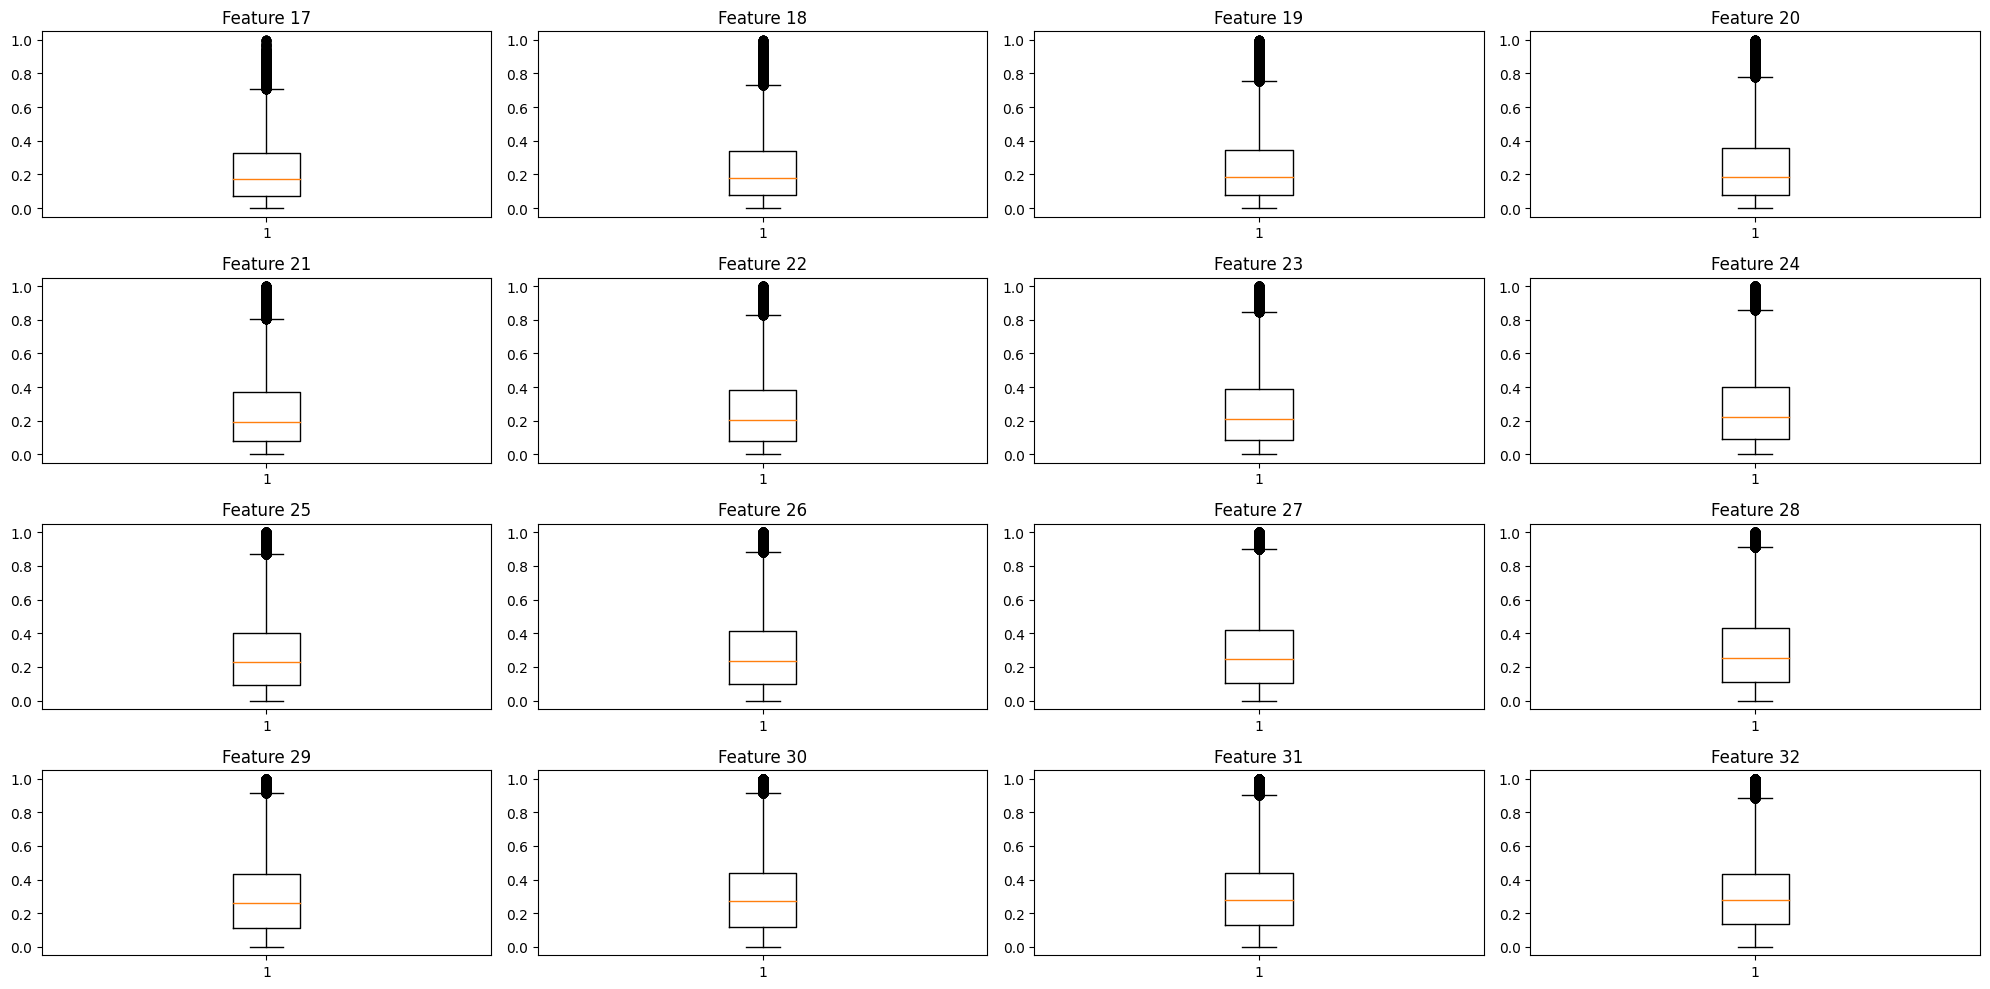

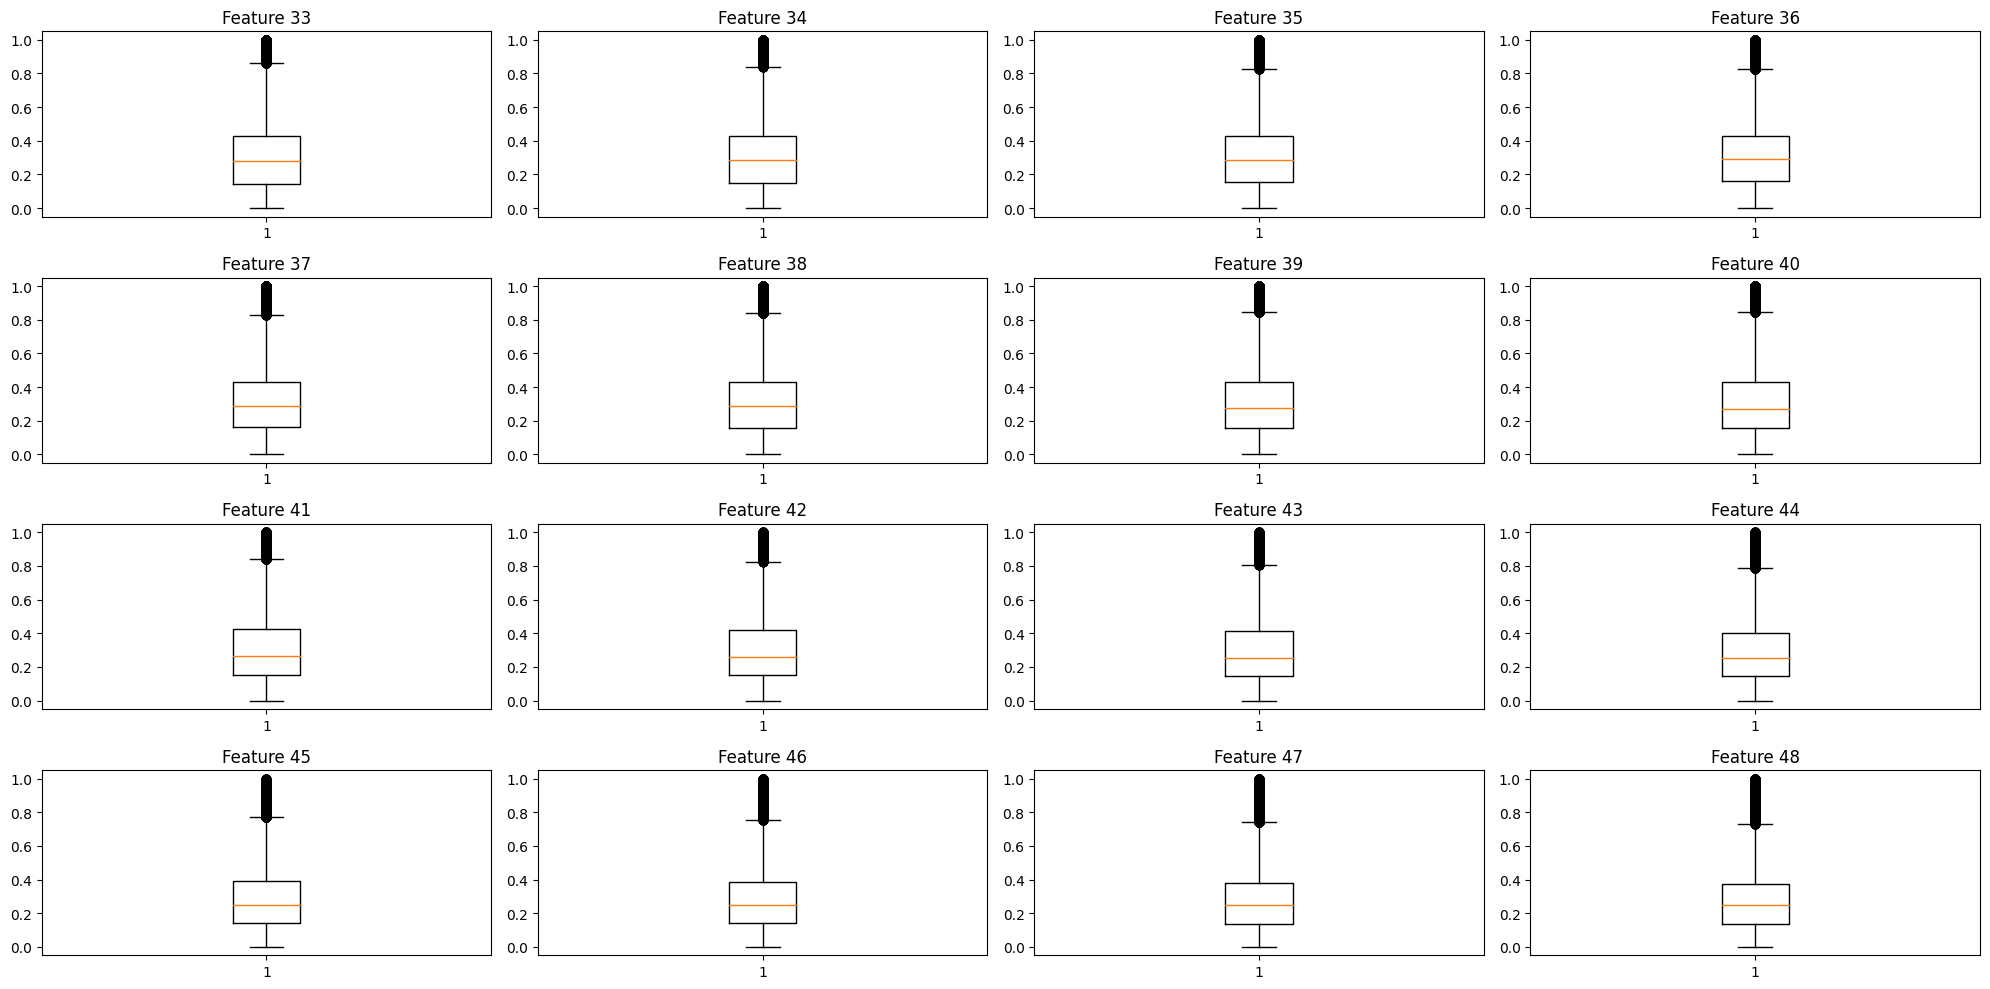

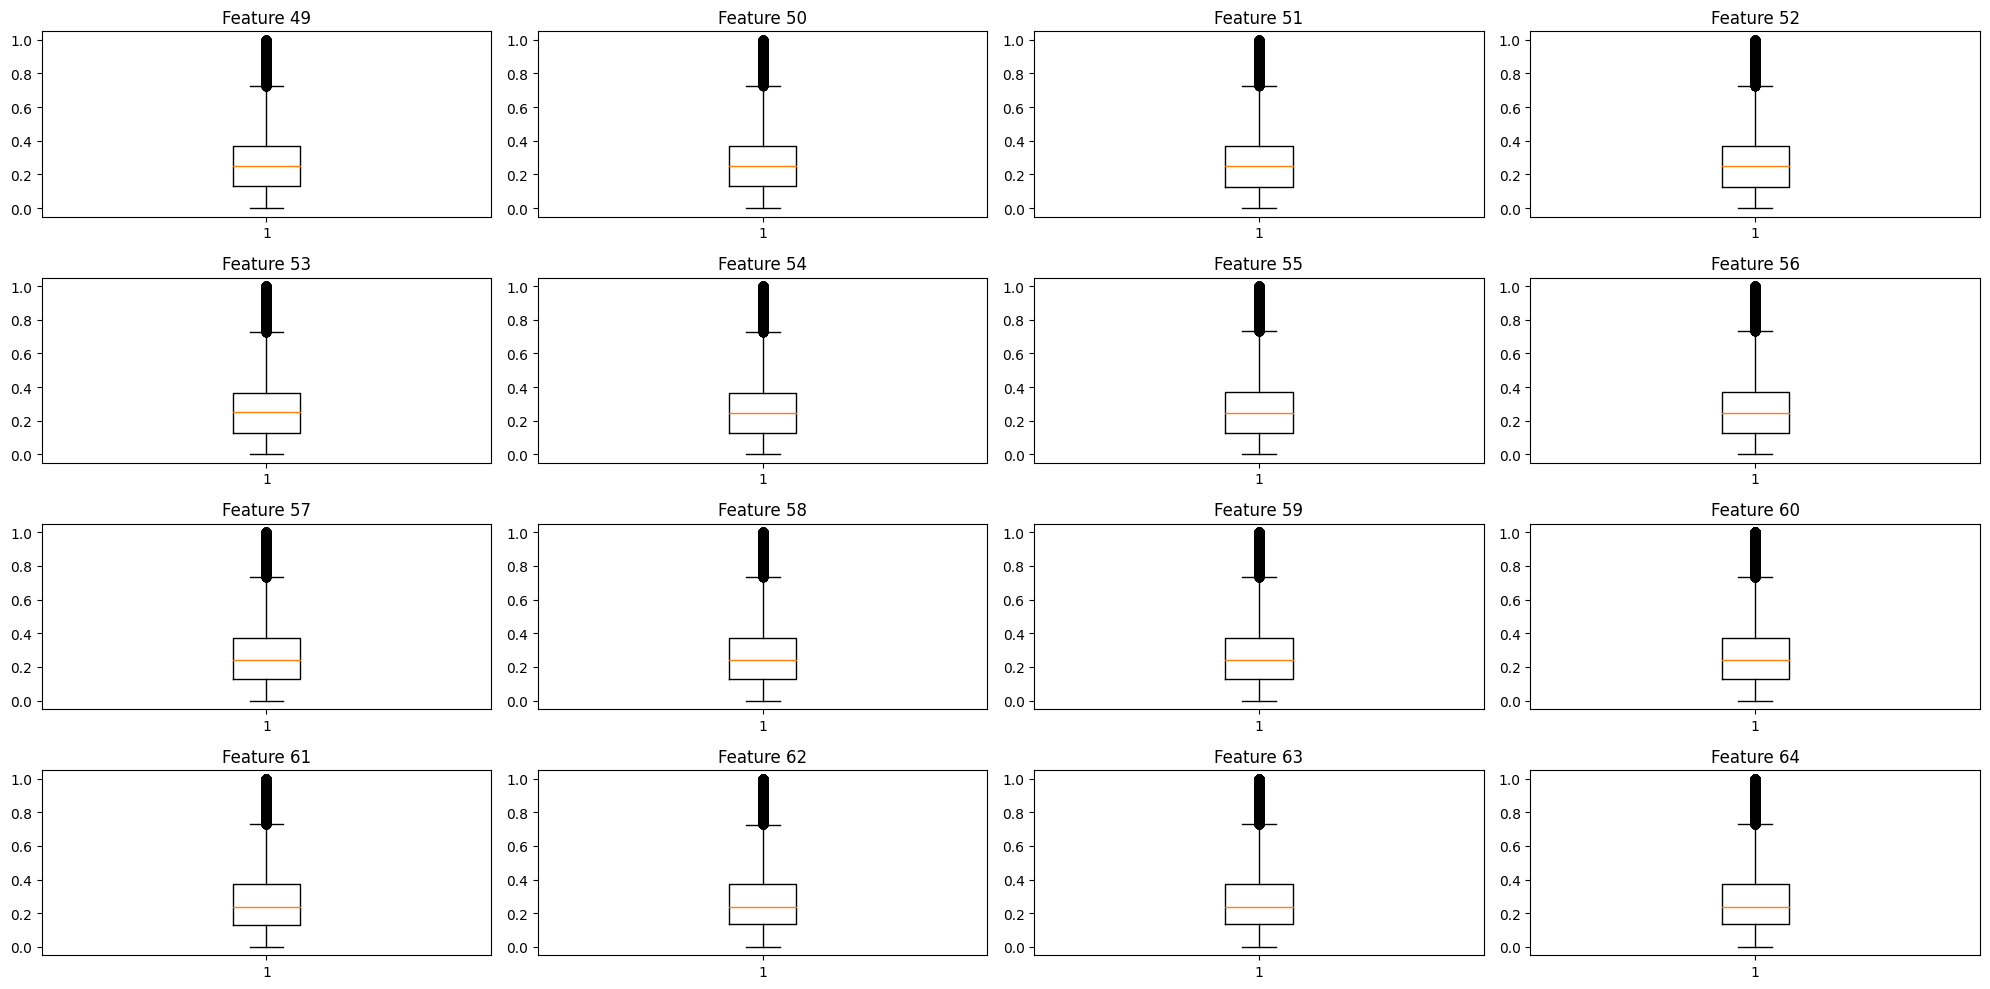

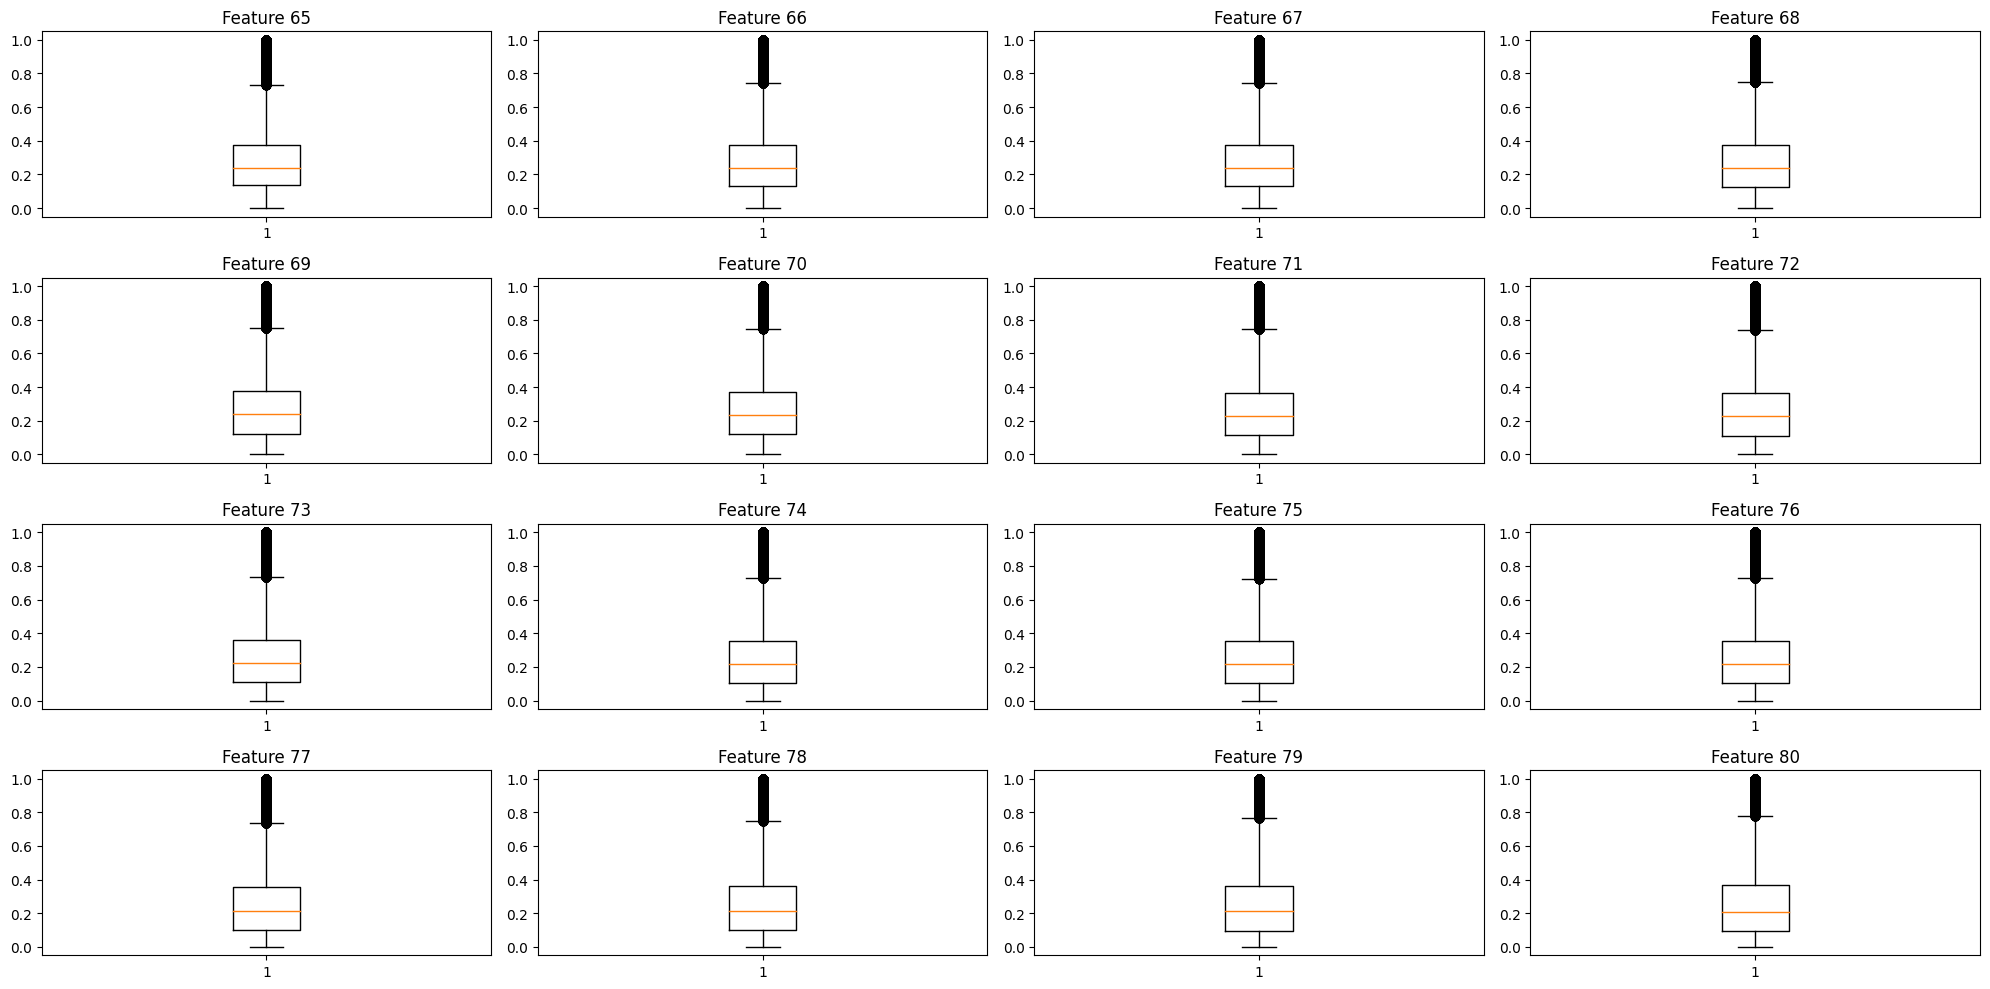

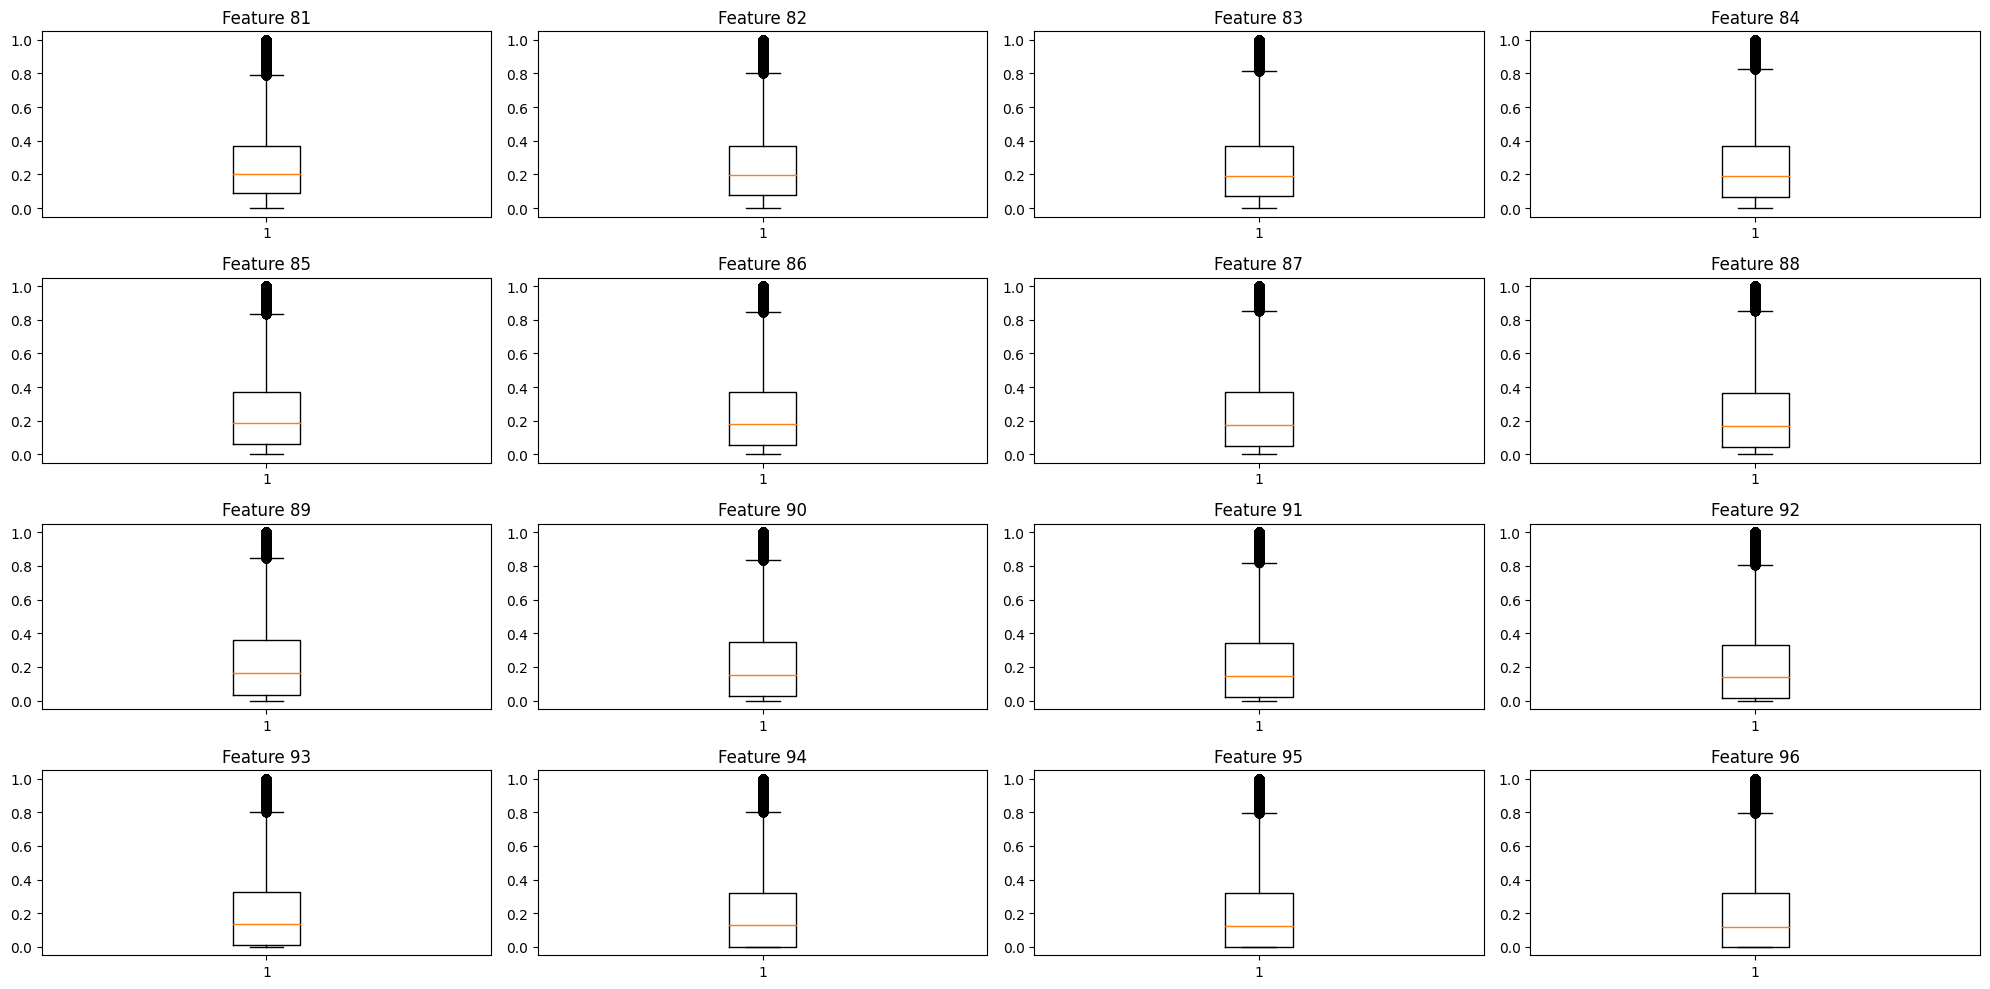

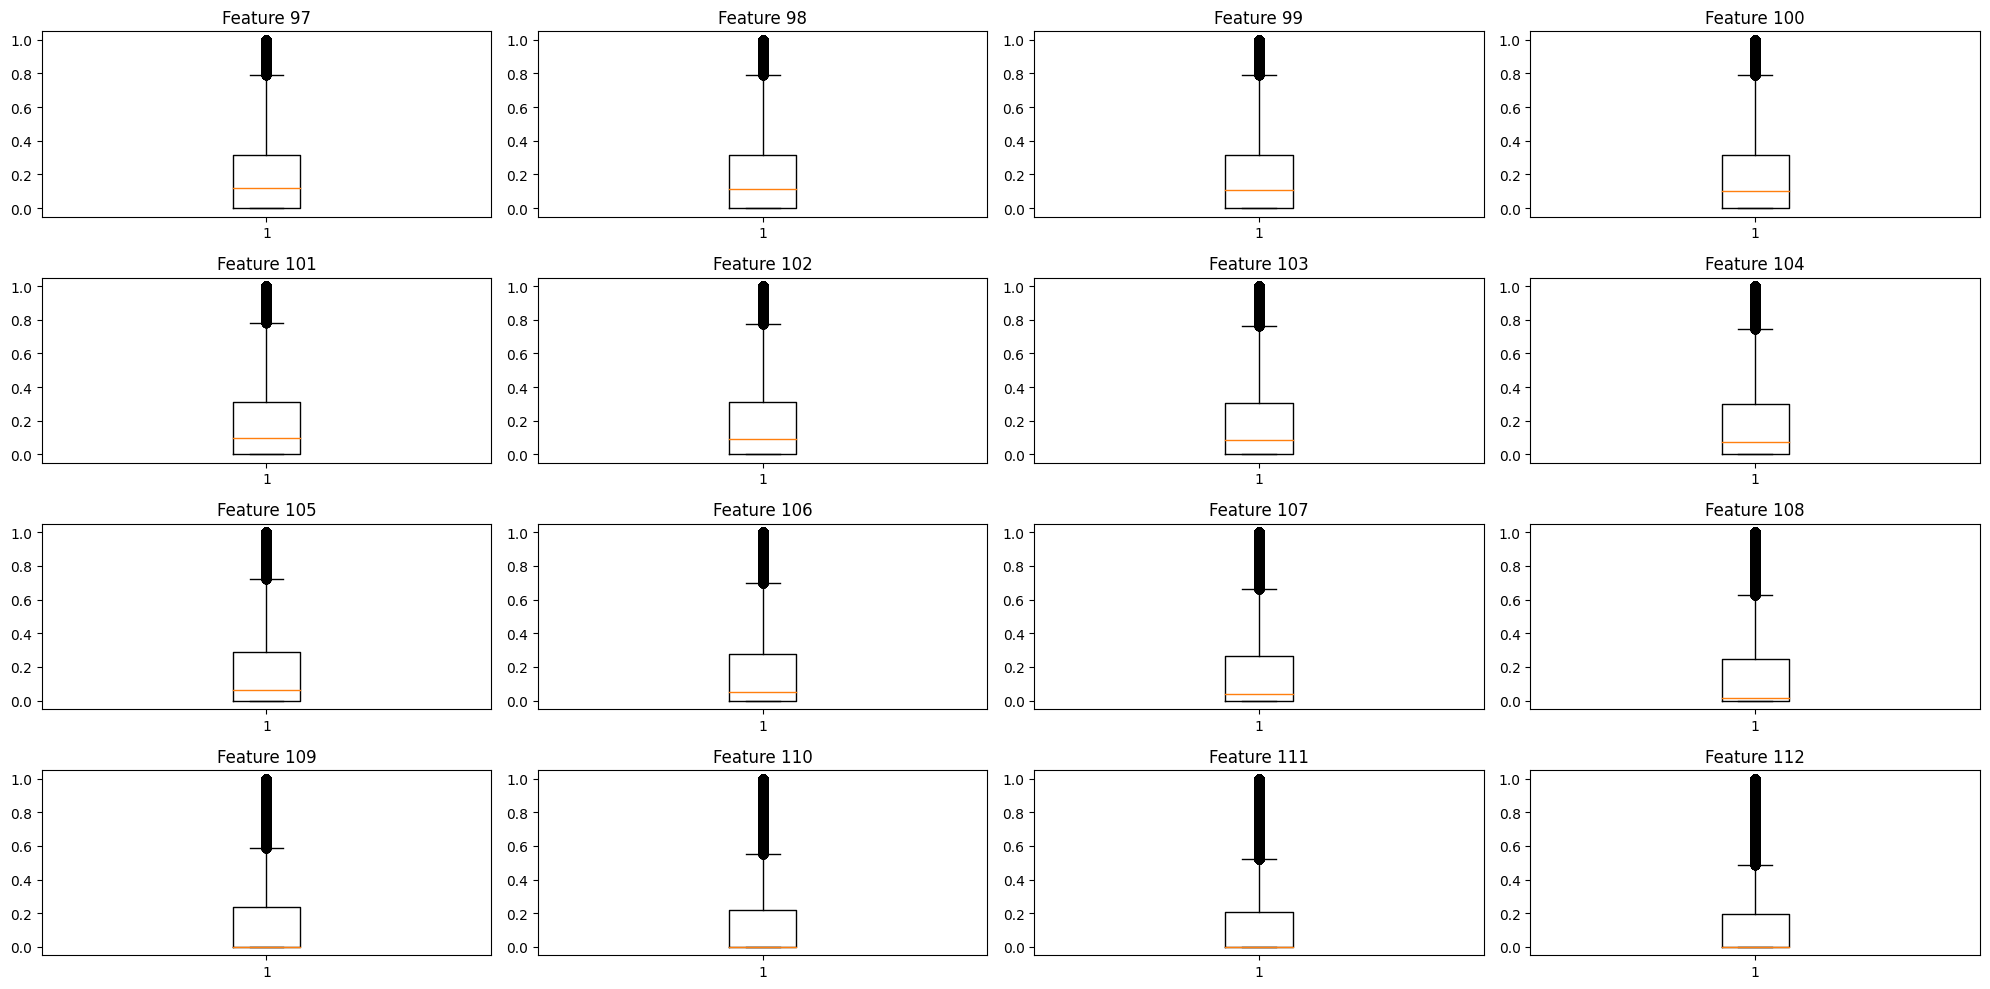

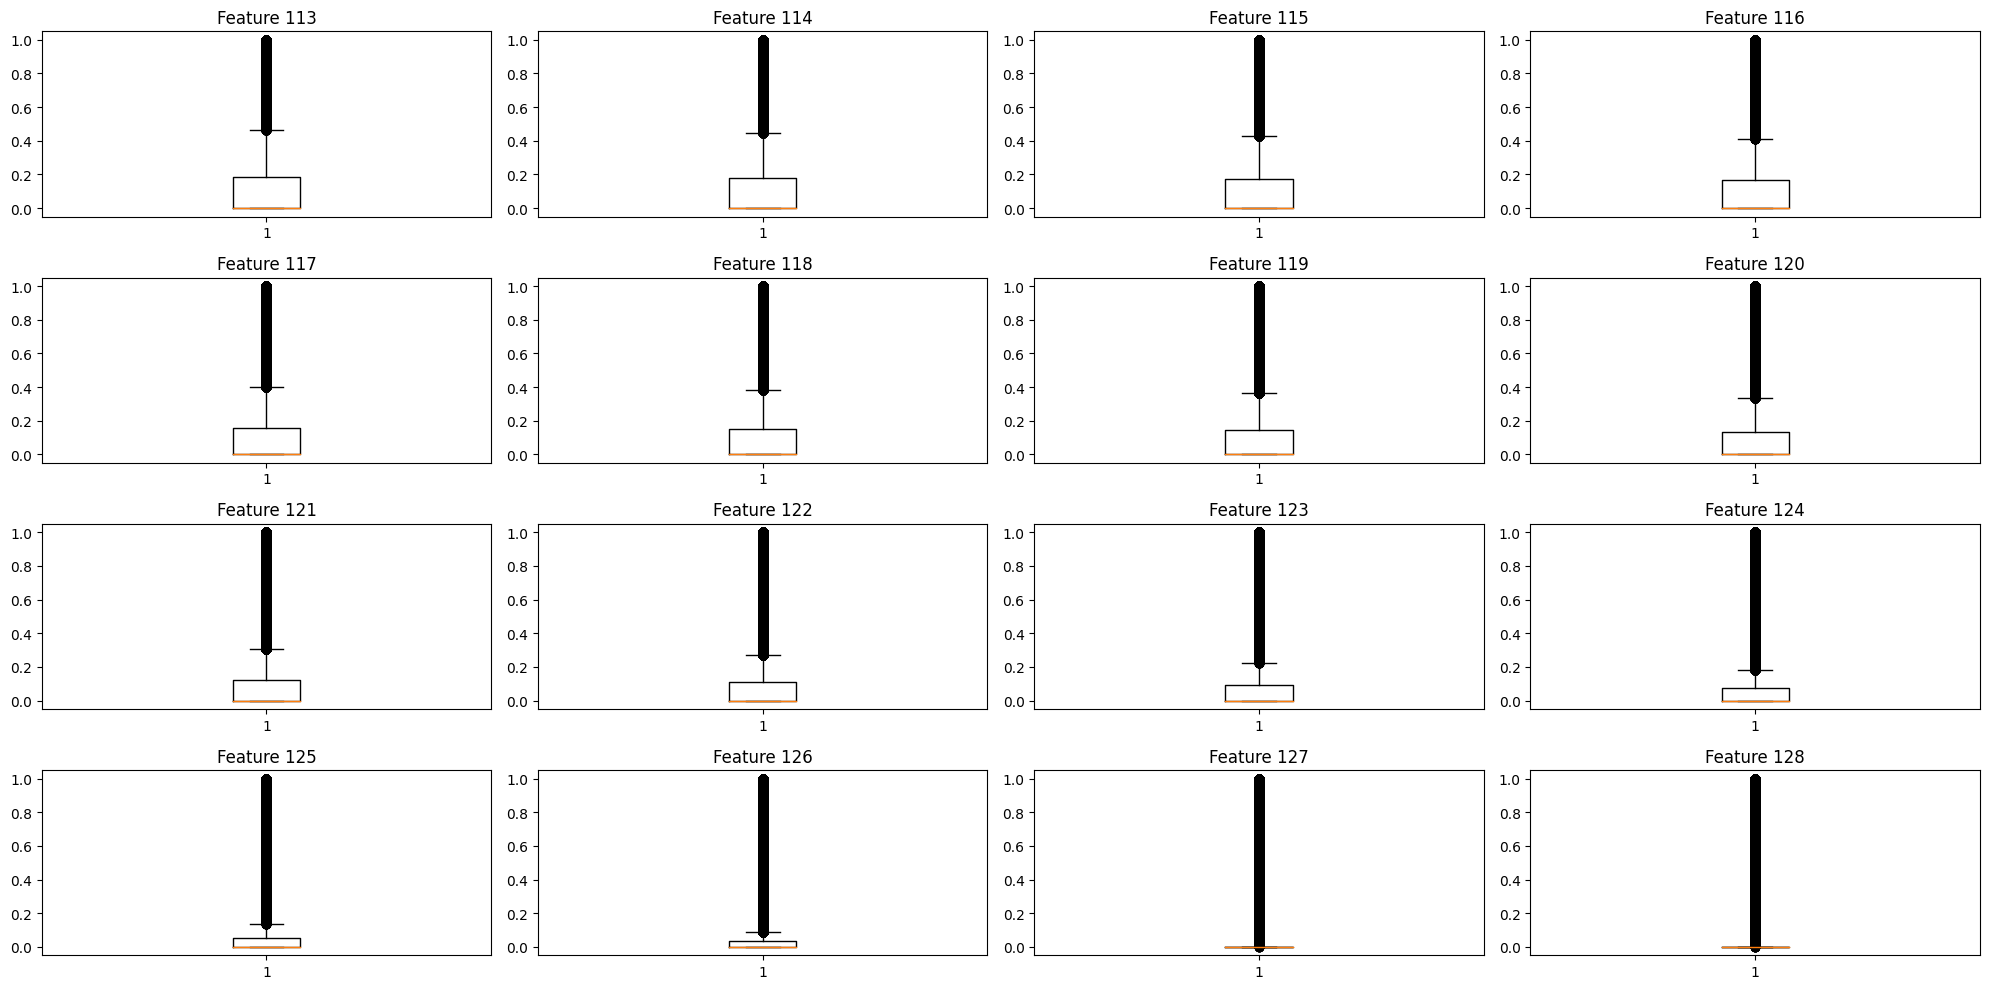

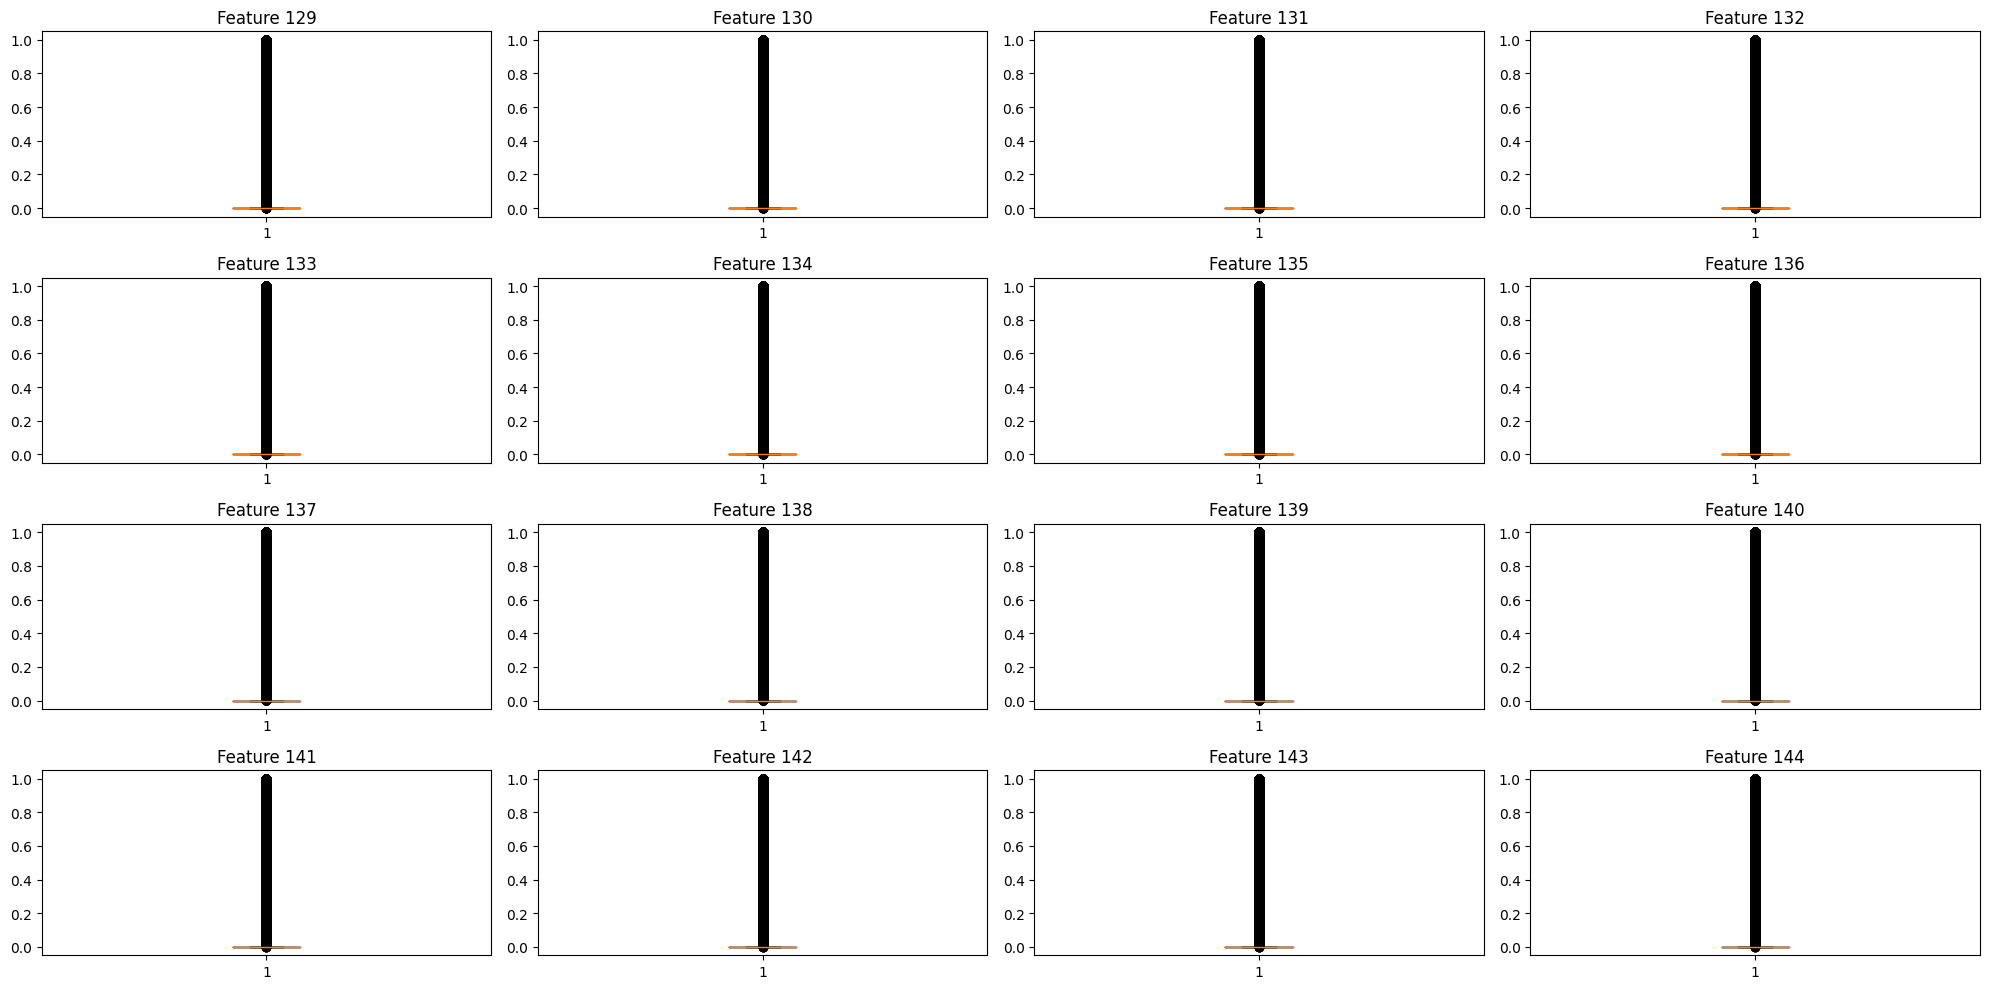

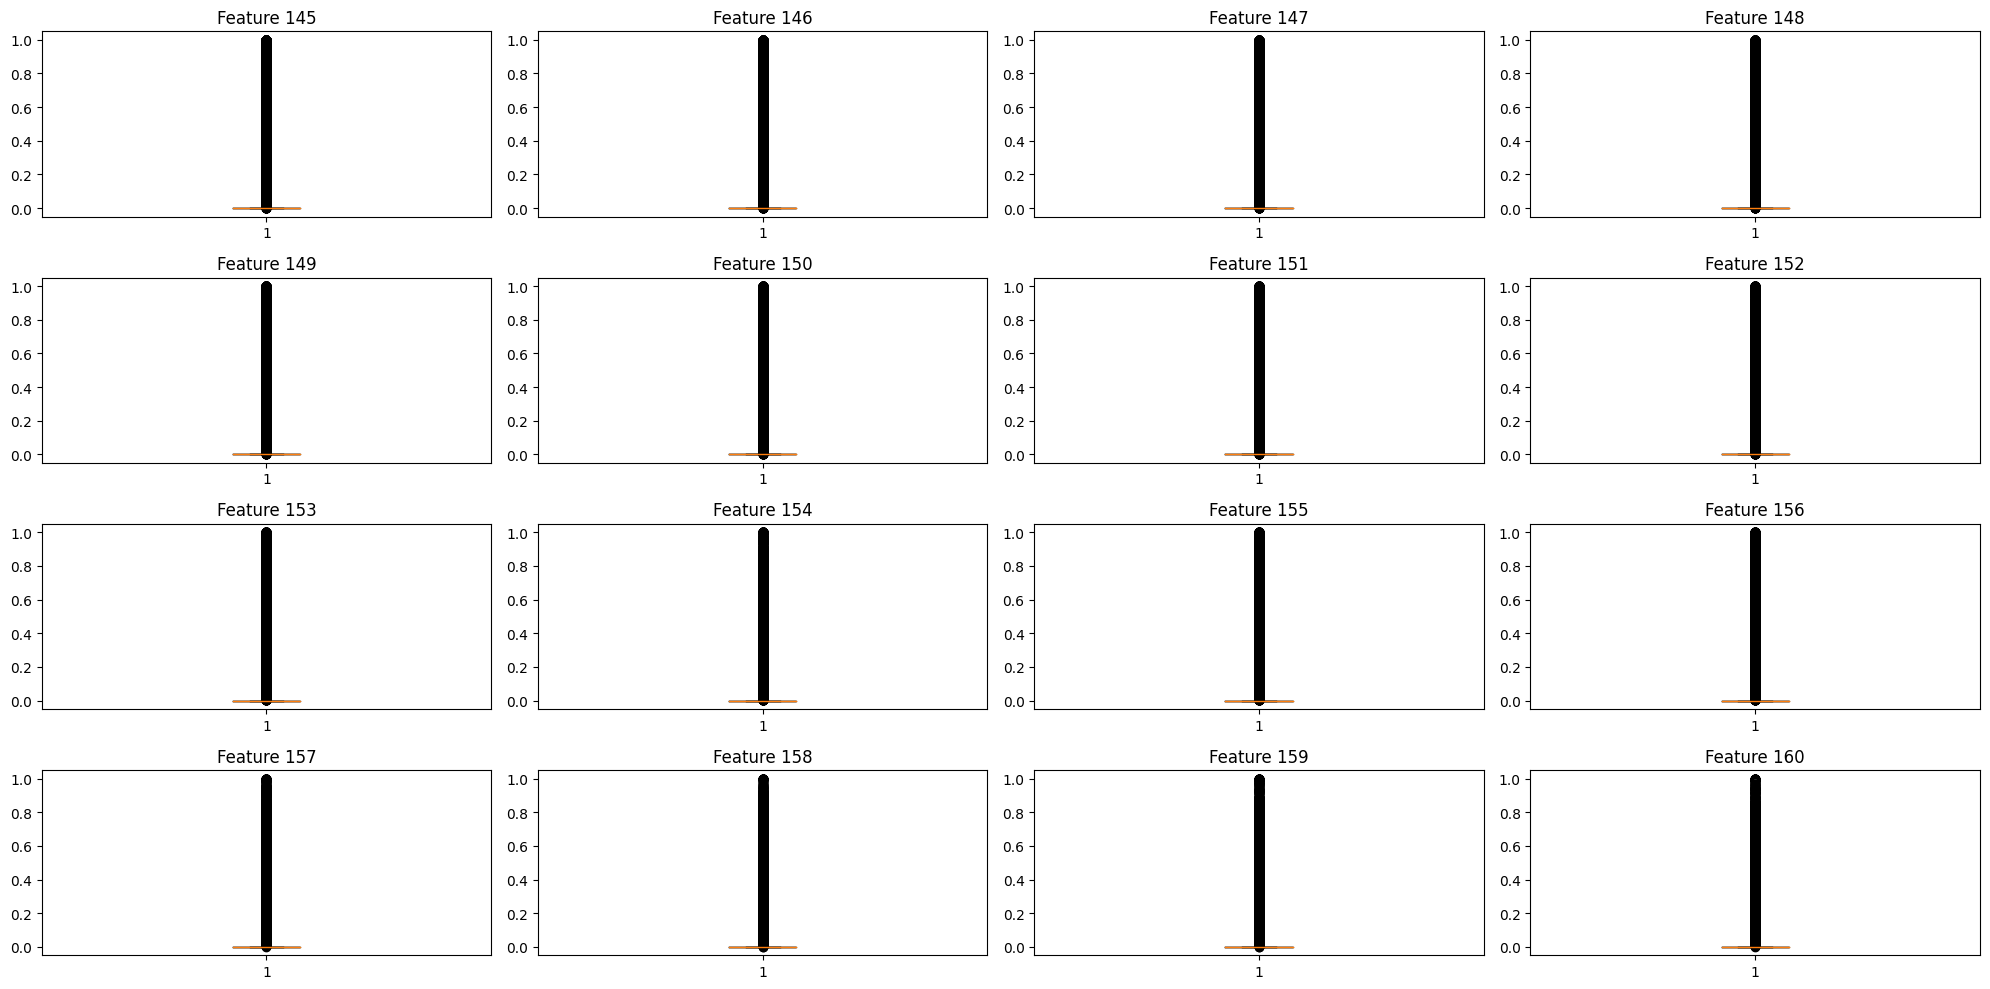

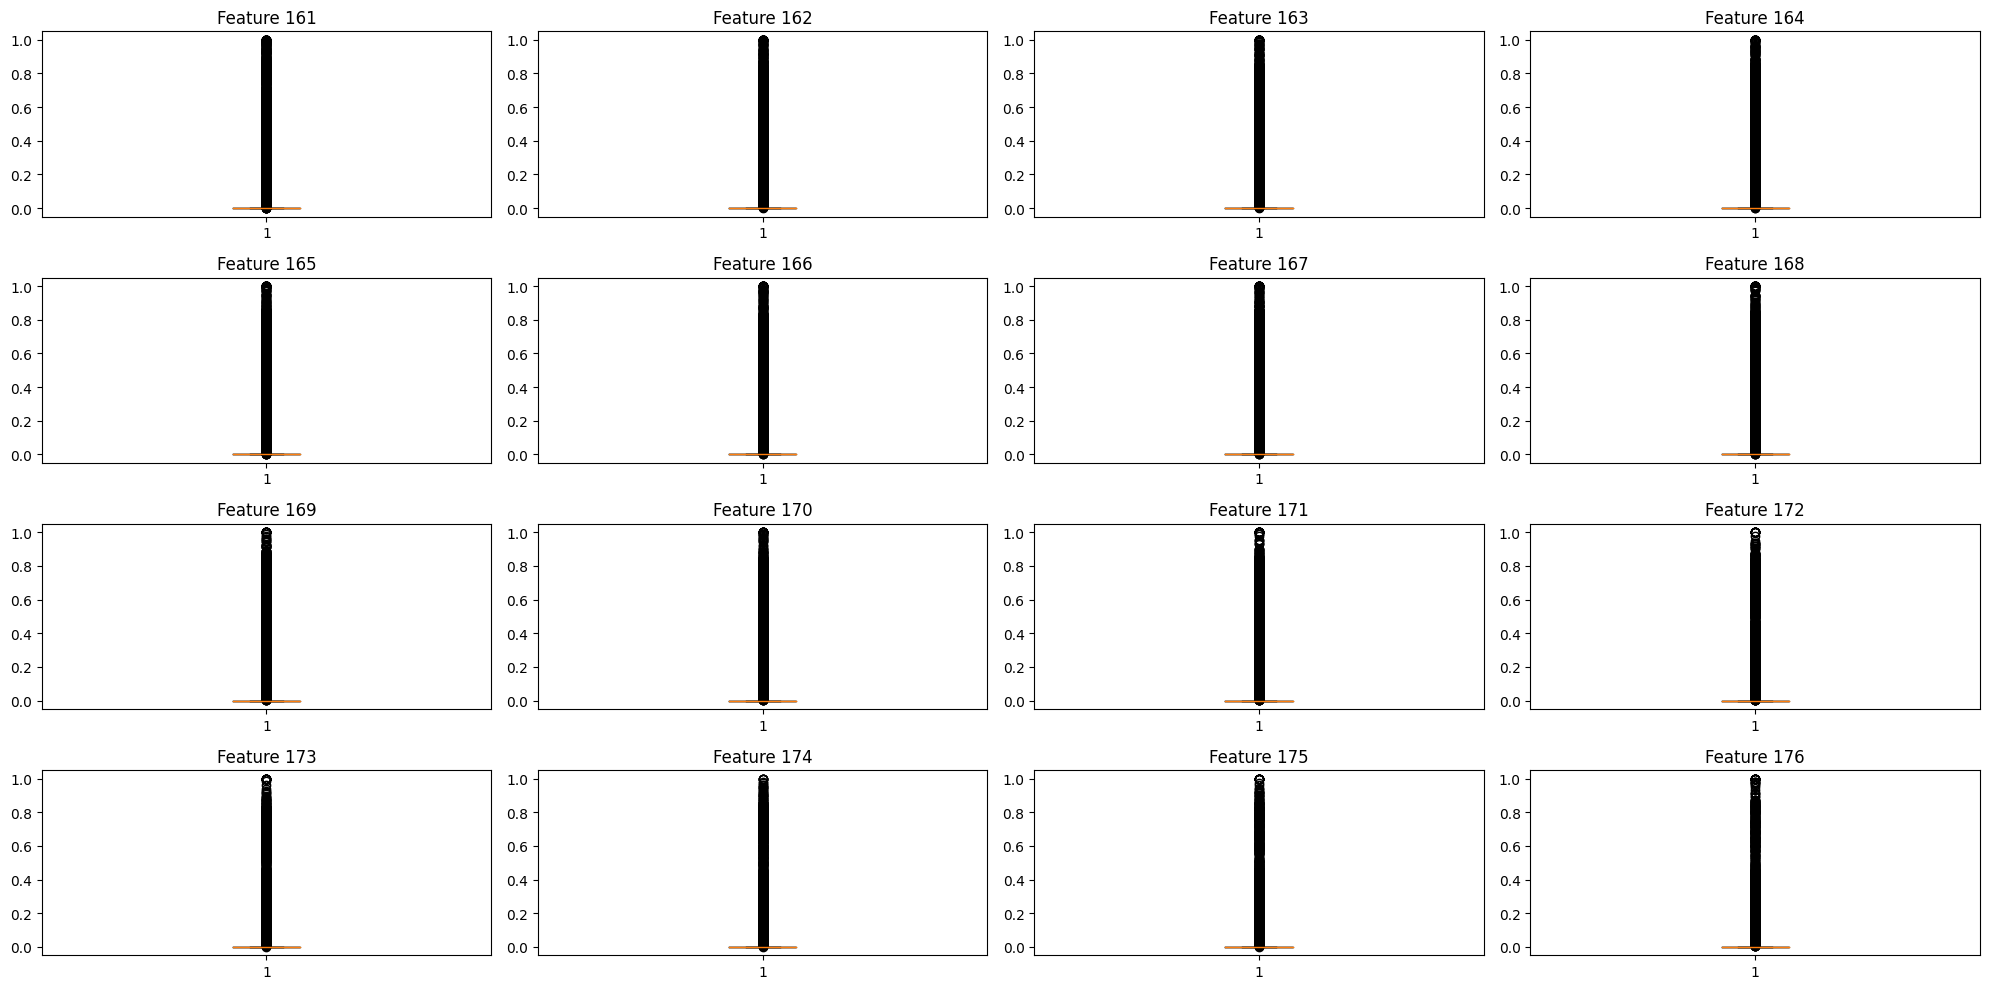

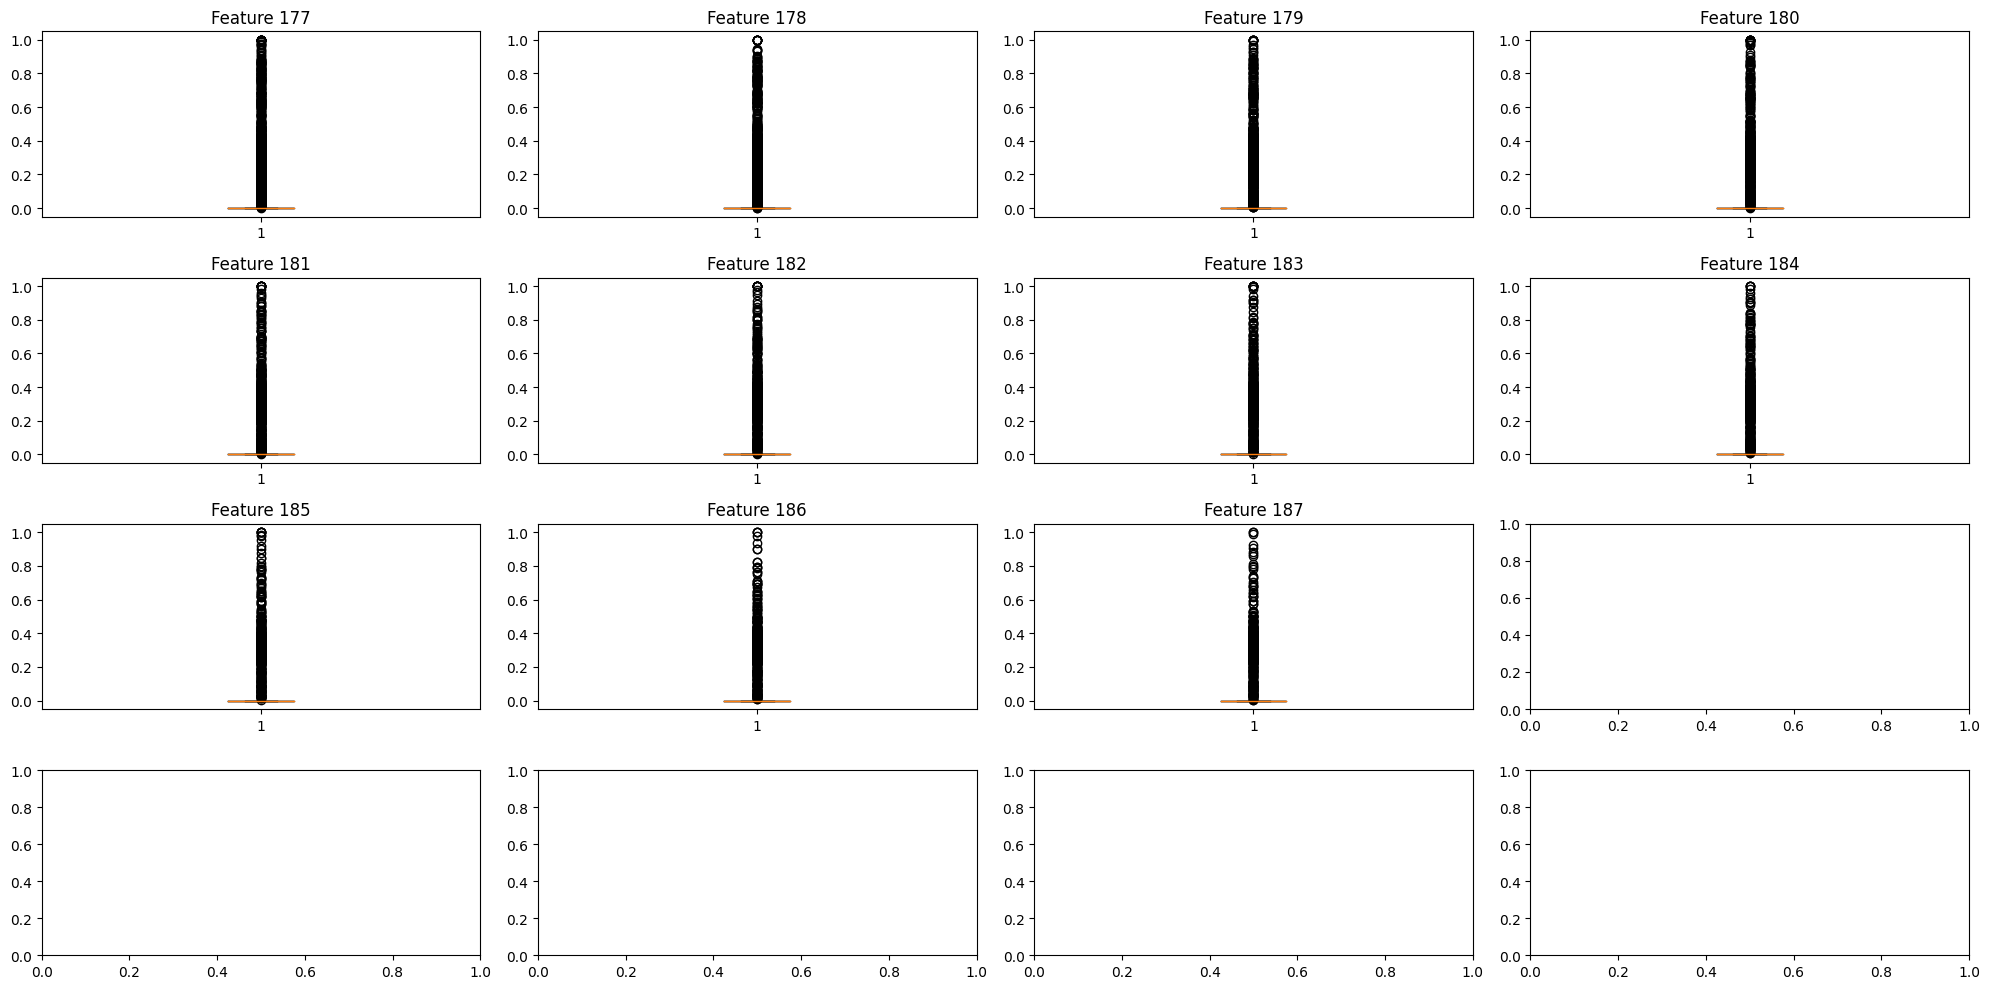

In [8]:
plots_per_row = 4
num_features = df.shape[1] - 1

rows_per_figure = (num_features + plots_per_row - 1) // plots_per_row
figs_needed = (rows_per_figure + 3) // 4

for fig_index in range(figs_needed):
    start_feature_index = fig_index * plots_per_row * 4
    end_feature_index = min(start_feature_index + plots_per_row * 4, num_features)

    # subplots
    fig, axes = plt.subplots(nrows=4, ncols=plots_per_row, figsize=(20, 10))  # Adjust figsize as needed
    axes = axes.ravel()

    # plot
    for i in range(start_feature_index, end_feature_index):
        ax = axes[i - start_feature_index]
        ax.boxplot(df.iloc[:, i])
        ax.set_title(f'Feature {i+1}')

        if i >= end_feature_index:
            ax.set_visible(False)

    plt.tight_layout()
    plt.show()

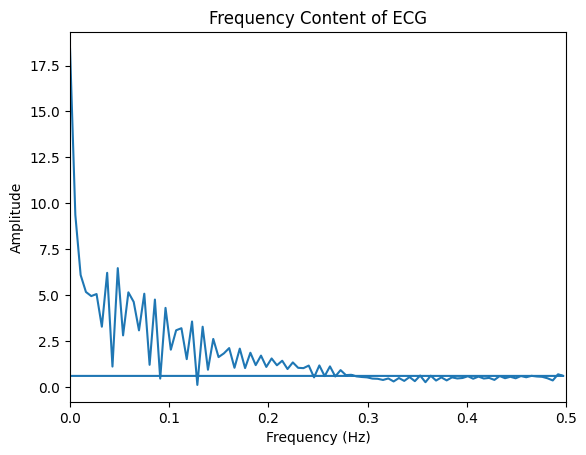

In [9]:
# FFT on the first sample, excluding the label
ecg_signal = df.iloc[0, :-1]
fft_ecg = np.fft.fft(ecg_signal)
frequencies = np.fft.fftfreq(len(fft_ecg))

plt.plot(frequencies, np.abs(fft_ecg))
plt.title("Frequency Content of ECG")
plt.xlim([0, 0.5])  # Limit to positive frequencies
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.show()

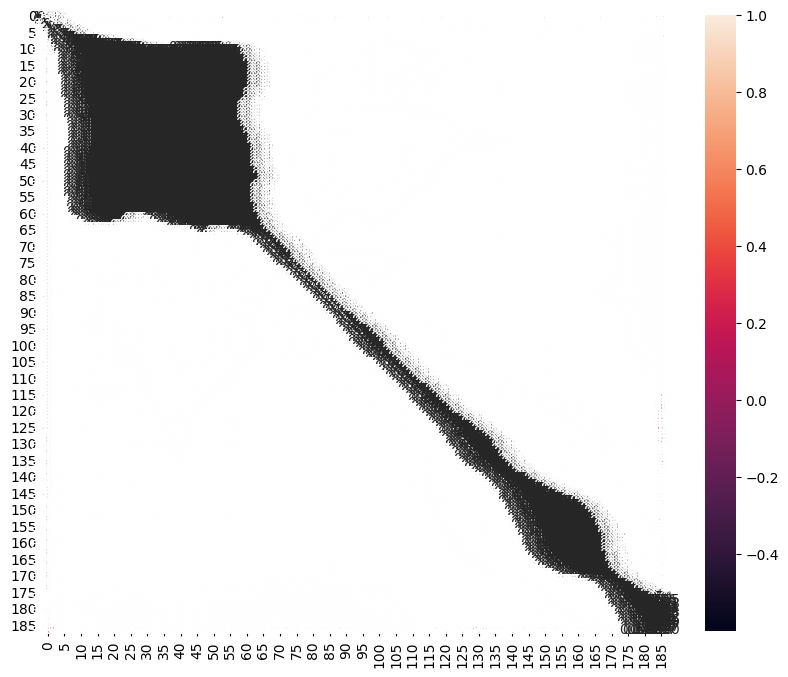

In [10]:
# correlation matrix
correlation_matrix = df.iloc[:, :-1].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()


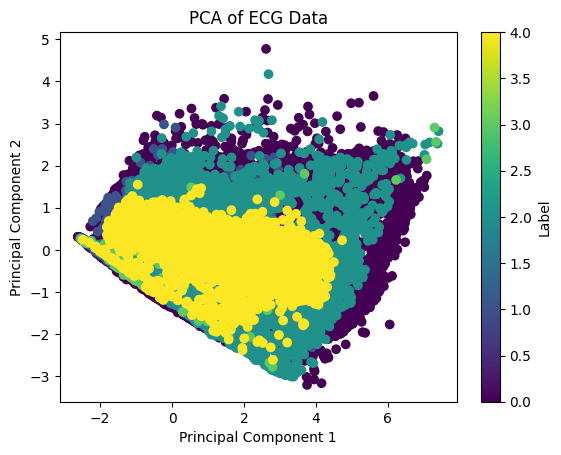

In [11]:
# PCA on feature columns
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df.iloc[:, :-1])

plt.scatter(principal_components[:, 0], principal_components[:, 1], c=df.iloc[:, -1])
plt.title("PCA of ECG Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Label")
plt.show()


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 87554 samples in 0.070s...
[t-SNE] Computed neighbors for 87554 samples in 22.136s...
[t-SNE] Computed conditional probabilities for sample 1000 / 87554
[t-SNE] Computed conditional probabilities for sample 2000 / 87554
[t-SNE] Computed conditional probabilities for sample 3000 / 87554
[t-SNE] Computed conditional probabilities for sample 4000 / 87554
[t-SNE] Computed conditional probabilities for sample 5000 / 87554
[t-SNE] Computed conditional probabilities for sample 6000 / 87554
[t-SNE] Computed conditional probabilities for sample 7000 / 87554
[t-SNE] Computed conditional probabilities for sample 8000 / 87554
[t-SNE] Computed conditional probabilities for sample 9000 / 87554
[t-SNE] Computed conditional probabilities for sample 10000 / 87554
[t-SNE] Computed conditional probabilities for sample 11000 / 87554
[t-SNE] Computed conditional probabilities for sample 12000 / 87554
[t-SNE] Computed conditional probabilities for s

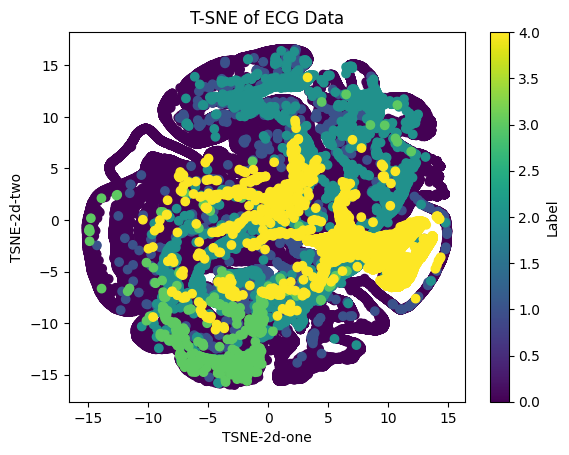

In [12]:
# T-SNE on feature columns, excluding the label
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df.iloc[:, :-1])

plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df.iloc[:, -1])
plt.title("T-SNE of ECG Data")
plt.xlabel("TSNE-2d-one")
plt.ylabel("TSNE-2d-two")
plt.colorbar(label="Label")
plt.show()


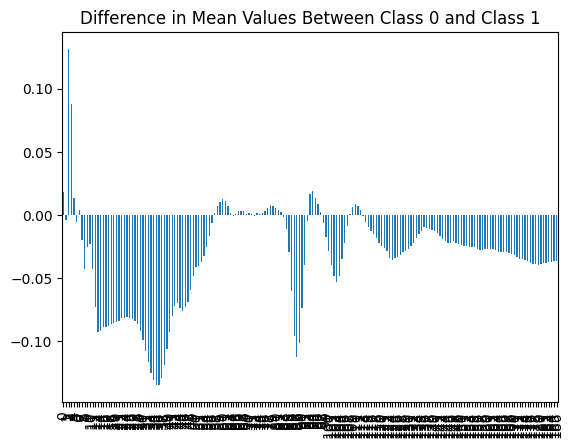

In [13]:
# Compare mean values between two classes, assuming binary classification
class_0_mean = df[df.iloc[:, -1] == 0].iloc[:, :-1].mean()
class_1_mean = df[df.iloc[:, -1] == 1].iloc[:, :-1].mean()

(class_0_mean - class_1_mean).plot.bar()
plt.title("Difference in Mean Values Between Class 0 and Class 1")
plt.show()
